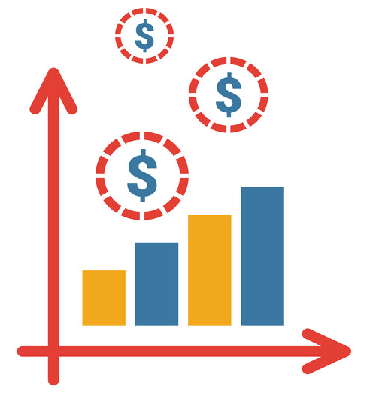

## Important Python Libraries

In [1]:
##---To remove warnings - make code output readable---#
import warnings
warnings.filterwarnings("ignore")

##---For DataFrame manipulation and Numpy array--#
import pandas as pd
import numpy as np

##---For visualization---#
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import seaborn as sns
from IPython.display import display, HTML

# library for Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Library for Training and testing data split
from sklearn.model_selection import train_test_split

# libraries for confusion Matrix, Classification Repports, ROC and AUC, R2, MAE, RMSE, MSE
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

## Load Data

In [2]:
data = pd.read_excel("Book1DATA.xlsx")
data.head(5)

,FinancialProductApplicantKey,ApplicantId,RAApplicantId,ApplicantRank,FirstName,LastName,Mailing Address1,Mailing Address2,Mailing City,Mailing State,...,HERODealerFeeDiscountRate,UserId,UserName,UserFullName,SalesforceManagerFullName,SalesforceOpportunityId,SalesforceOpportunityLastModifiedDate,SalesforceOpportunityStage,PipelineActive,ReportingValid
0,954014,1010482,28B0319D-51C0-4E1C-B7C8-182BF2ADD7F0,1,Michael,Quinn,12669 N Marina Village Dr,NaN,Traverse City,MI,...,0,3759,jtouchstone,Jerome Touchstone,Thomas Cavallo,NaN,NaN,NaN,0,1
1,941690,998599,DCBEEB0E-83E9-4BB7-AF05-D45A681B7EAE,1,Larry,Housley,602 w palmer st,NaN,Morrisville,PA,...,4,3802,joliva,James Oliva,Thomas Cavallo,NaN,NaN,NaN,1,1
2,950003,1006468,3EF4D72B-2ACE-47B7-9EE9-E33BE60E8621,1,Gabriel,Aguilera,2582 Ogden St,NaN,San Bernardino,CA,...,0,823,istemler,Iris Stemler,Jordan Fischer,NaN,NaN,NaN,1,1
3,103827,967953,C72ADB37-94A4-48E8-8CA3-02E0BBCC0019,1,Ryan,Moss,300 SE Moore St,NaN,Blue Springs,MO,...,0,3929,tkelley,Thomas Kelley,Brandon Wareham,NaN,NaN,NaN,1,1
4,128960,980218,8F3EB400-6DDD-4D78-A5EE-842FCD555C47,1,Jose,Salazar-acevedo,39515 Willowbend Dr,NaN,Murrieta,CA,...,0,2946,rricketts,Ronald Ricketts,Jordan Fischer,NaN,NaN,NaN,0,1


In [3]:
print("There are total {} loan Applicants".format(data["ApplicantId"].nunique()))

There are total 75748 loan Applicants


**Remove those columns where all values are Missing/ Null/ NaN**

In [4]:
columns_to_consider = []
for i in data.columns:
    if data[i].isna().sum() != 75748:
        columns_to_consider.append(i)
        
print("There are {} columns/ potential features".format(data.shape[1]))
print("There are {} columns where all values are Null".format(data.shape[1] - len(columns_to_consider)))

There are 171 columns/ potential features
There are 26 columns where all values are Null


In [141]:
sub_dataset = data[columns_to_consider]

## Data Pre-processing

- Convert categories such as Final Expired 0/1/2 to Final Expired

In [142]:
sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Expired 0", "Final - Expired")
sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Expired 1", "Final - Expired")
sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Expired 2", "Final - Expired")
sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Expired 3", "Final - Expired")
sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Expired 4", "Final - Expired")

sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Canceled 0", "Final - Canceled")
sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Canceled 1", "Final - Canceled")
sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Canceled 2", "Final - Canceled")
sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Canceled 3", "Final - Canceled")
sub_dataset["LoanStatus"] = sub_dataset["LoanStatus"].replace("Final - Canceled 4", "Final - Canceled")

sub_dataset["AUSStatus"].value_counts(normalize=True).mul(100).round(2)

Open                      61.83
Denied                    19.23
Approved                  11.87
In Review                  6.49
Conditionally Approved     0.59
Name: AUSStatus, dtype: float64

In [143]:
sub_dataset["Mailing State"] = sub_dataset["Mailing State"].fillna(sub_dataset["Mailing State"].mode())
sub_dataset["EmploymentType"] = sub_dataset["EmploymentType"].fillna(sub_dataset["EmploymentType"].mode())
sub_dataset["ProjectType"] = sub_dataset["ProjectType"].fillna("DidNotMentioned")

## Potential Features

In [144]:
features = ["ApplicantId","Mailing State", "EmploymentType", "AgeAtApplication", "StatedMonthlyIncome", "FrozenBureaus", "XPNFICO",\
           "TUFICO", "XPNBK", "FinancialProduct", "ApplicationDateDim", "ProjectType", "Property State", "RequestedAmount",\
           "DecisionFICOScore", "DecisionBKScore", "AUSStatus", "AutoDecision", "ApplicationDate","AutoDecisionDate", \
            "SoftDecision", "HardDecision", "MaxOfferAmount", "LoanId","LoanStatus", "LoanStage", "LoanAmount", \
            "LoanTermInMonths", "MonthlyPayment", "Program",\
            "APR","InterestRate", 'FundedDateDim', 'NetFundedAmount', "FinancingPlan", "TotalFinanceCharge", \
            "GrossDealerFee", "GrossDealerFeeRate", "DiscountDealerFee", "DiscountDealerFeeRate","NetDealerFee",\
            "NetDealerFeeRate", "UWMonthlyDebtPayments", "UWPreLoanDTI", "UWPostLoanDTI",\
            "ContractorOrganizationId", "ContractorId", "Contrator User First Name", "Contrator User Last Name",\
            "Contrator User Email", "Contrator User Phone", "ContractorKey", "ContractorJobNumber", "ContractorNumber",\
            "HEROAccountManagerId", "ContractorOrganizationName", "ContractorCity", "LocationNickname", "Branch",\
            "ContractorTypeName", "BoostList", "Contractor Applied Date", "Contractor Registration Date", \
            "AccountStatus", "AccountStatusName", "Contractor Effective Date", \
            "BenjiDealerFeeDiscountRate", "HERODealerFeeDiscountRate", "UserId", "UserName"]

sub_dataset = sub_dataset[features]

## Missing Values Analysis

In [145]:
sub_dataset.isna().sum()

ApplicantId                         0
Mailing State                       4
EmploymentType                      8
AgeAtApplication                    0
StatedMonthlyIncome              2675
FrozenBureaus                   42668
XPNFICO                         25851
TUFICO                          70994
XPNBK                           25266
FinancialProduct                    0
ApplicationDateDim                  0
ProjectType                         0
Property State                      0
RequestedAmount                 69734
DecisionFICOScore               20045
DecisionBKScore                 38503
AUSStatus                           0
AutoDecision                       53
ApplicationDate                     0
AutoDecisionDate                   42
SoftDecision                     3408
HardDecision                    53614
MaxOfferAmount                  39002
LoanId                              0
LoanStatus                          0
LoanStage                           0
LoanAmount  

In [146]:
sub_dataset["FirstLastNameAddress"] = data["FirstName"].astype(str)+" "+data["LastName"].astype(str)+" "+data["Mailing Address1"].astype(str)

temp = data[["ApplicantId"]]
temp["ApplicantName"] = data["FirstName"].astype(str)+" "+data["LastName"].astype(str)+" "+data["Mailing Address1"].astype(str)
temp = temp.groupby("ApplicantName").ApplicantId.nunique().reset_index()
temp.columns = ["FirstLastNameAddress", "WhetherApplicantAvailLoanPreviously"]

sub_dataset = sub_dataset.merge(temp, on="FirstLastNameAddress", how="left")

In [147]:
sub_dataset.to_csv("Processed_Data.csv", index=False)

In [148]:
data['days_to_go'] = (data.DocsSentDate - data.ApplicationDate).dt.days
data[(~data['days_to_go'].isna()) & (data['days_to_go'] !=0 )][['days_to_go']].mean()

days_to_go    14.199177
dtype: float64

## Exploratory Data Analysis

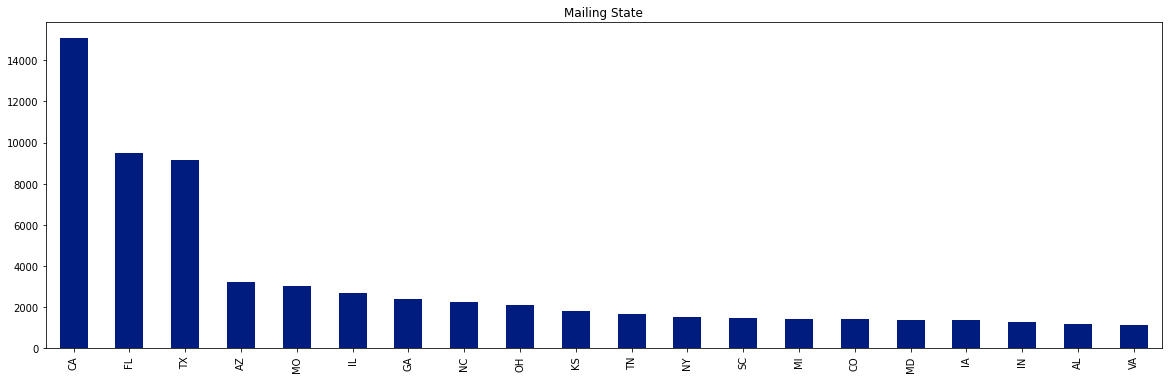

,index,Mailing State
0,CA,19.92%
1,FL,12.5%
2,TX,12.08%
3,AZ,4.26%
4,MO,3.98%
5,IL,3.54%
6,GA,3.19%
7,NC,3.0%
8,OH,2.77%
9,KS,2.39%


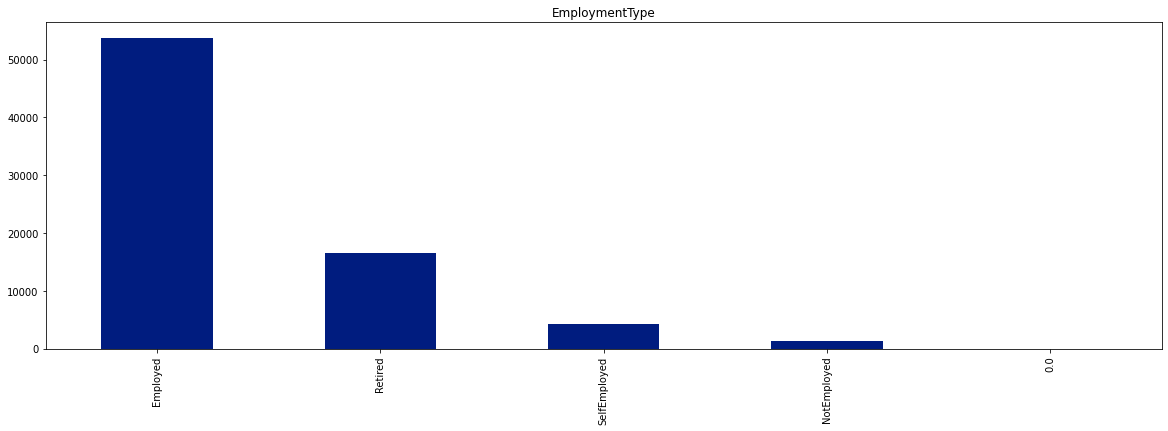

,index,EmploymentType
0,Employed,70.94%
1,Retired,21.78%
2,SelfEmployed,5.52%
3,NotEmployed,1.75%
4,0,0.01%


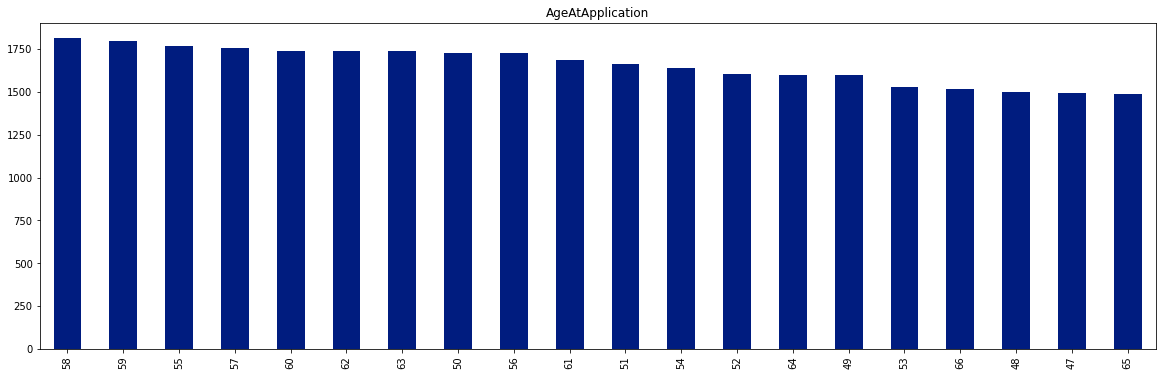

,index,AgeAtApplication
0,58,2.39%
1,59,2.37%
2,55,2.33%
3,57,2.32%
4,60,2.3%
5,62,2.29%
6,63,2.29%
7,50,2.28%
8,56,2.28%
9,61,2.23%


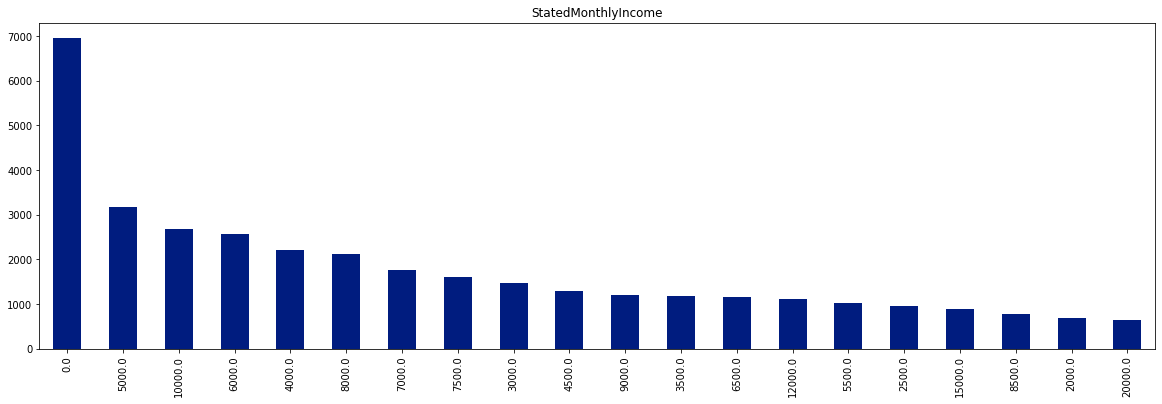

,index,StatedMonthlyIncome
0,0.0,9.18%
1,5000.0,4.19%
2,10000.0,3.53%
3,6000.0,3.4%
4,4000.0,2.92%
5,8000.0,2.8%
6,7000.0,2.31%
7,7500.0,2.12%
8,3000.0,1.94%
9,4500.0,1.72%


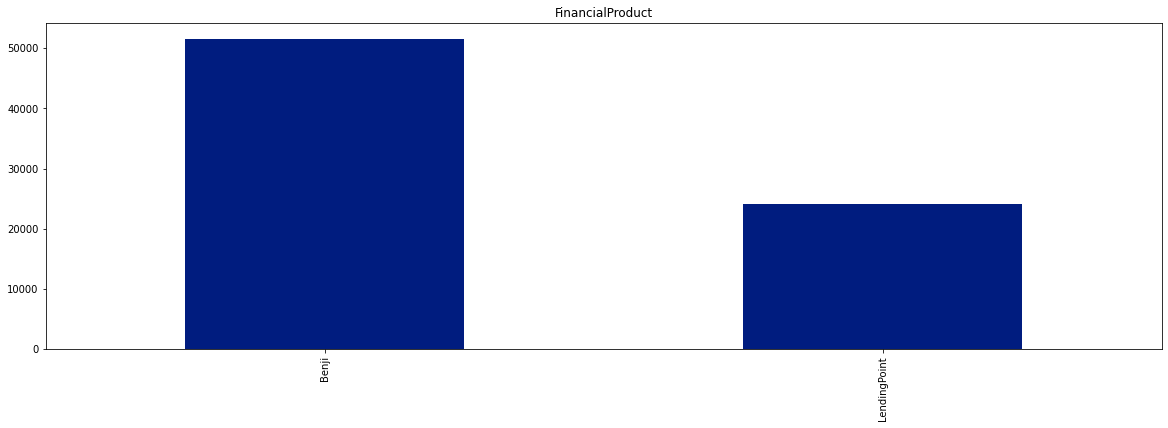

,index,FinancialProduct
0,Benji,68.13%
1,LendingPoint,31.87%


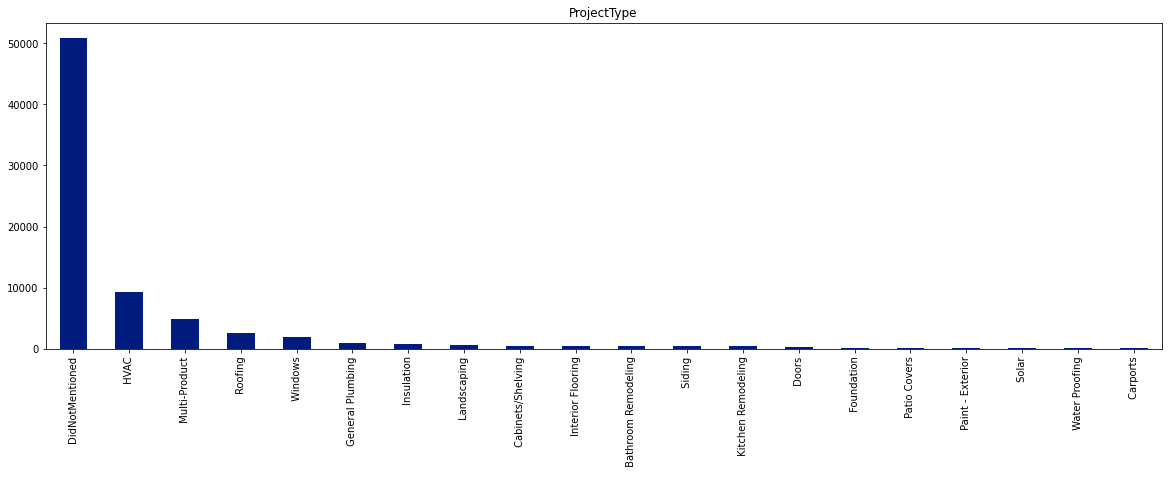

,index,ProjectType
0,DidNotMentioned,67.13%
1,HVAC,12.28%
2,Multi-Product,6.36%
3,Roofing,3.36%
4,Windows,2.43%
5,General Plumbing,1.32%
6,Insulation,1.03%
7,Landscaping,0.72%
8,Cabinets/Shelving,0.67%
9,Interior Flooring,0.58%


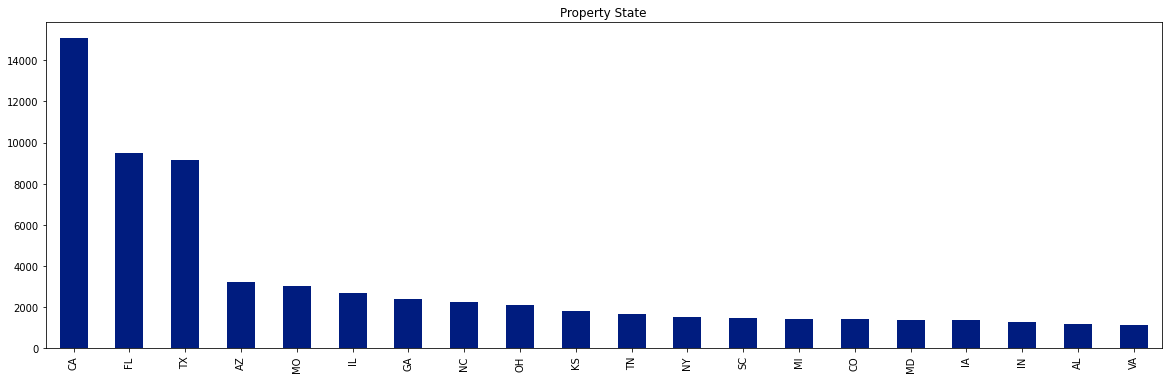

,index,Property State
0,CA,19.92%
1,FL,12.55%
2,TX,12.07%
3,AZ,4.29%
4,MO,4.01%
5,IL,3.54%
6,GA,3.19%
7,NC,2.99%
8,OH,2.76%
9,KS,2.37%


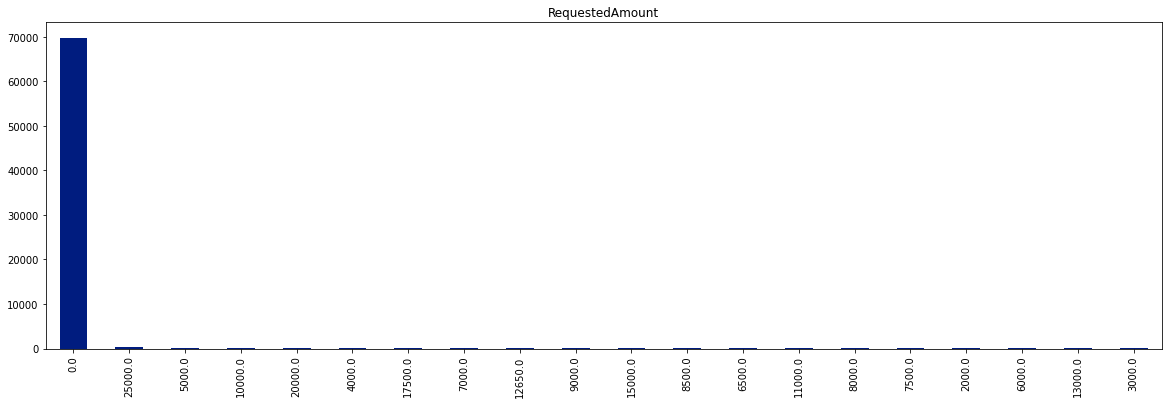

,index,RequestedAmount
0,0.0,92.06%
1,25000.0,0.31%
2,5000.0,0.13%
3,10000.0,0.11%
4,20000.0,0.09%
5,4000.0,0.06%
6,17500.0,0.06%
7,7000.0,0.05%
8,12650.0,0.05%
9,9000.0,0.05%


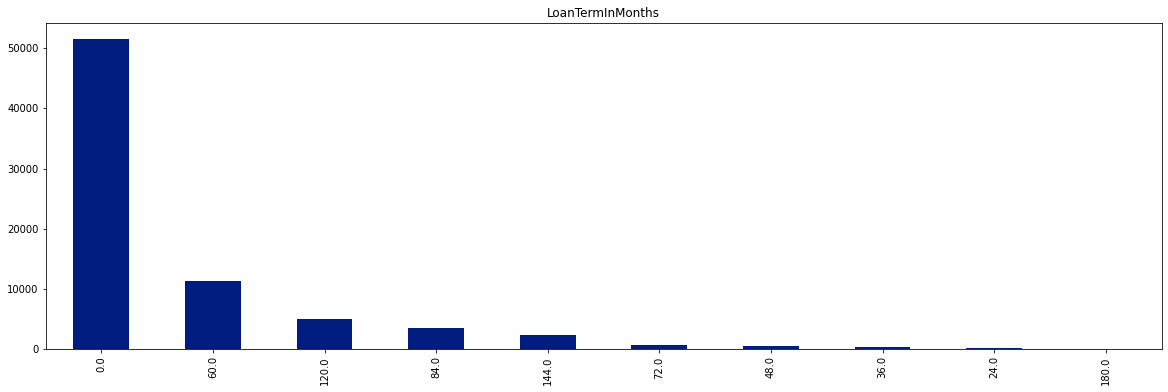

,index,LoanTermInMonths
0,0.0,68.07%
1,60.0,14.88%
2,120.0,6.71%
3,84.0,4.71%
4,144.0,3.15%
5,72.0,1.01%
6,48.0,0.63%
7,36.0,0.53%
8,24.0,0.22%
9,180.0,0.09%


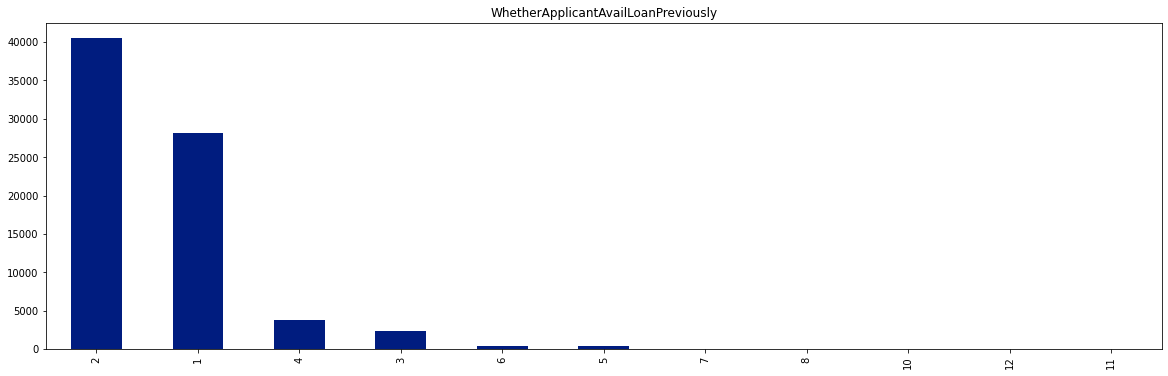

,index,WhetherApplicantAvailLoanPreviously
0,2,53.44%
1,1,37.22%
2,4,4.93%
3,3,3.15%
4,6,0.58%
5,5,0.51%
6,7,0.06%
7,8,0.05%
8,10,0.03%
9,12,0.02%


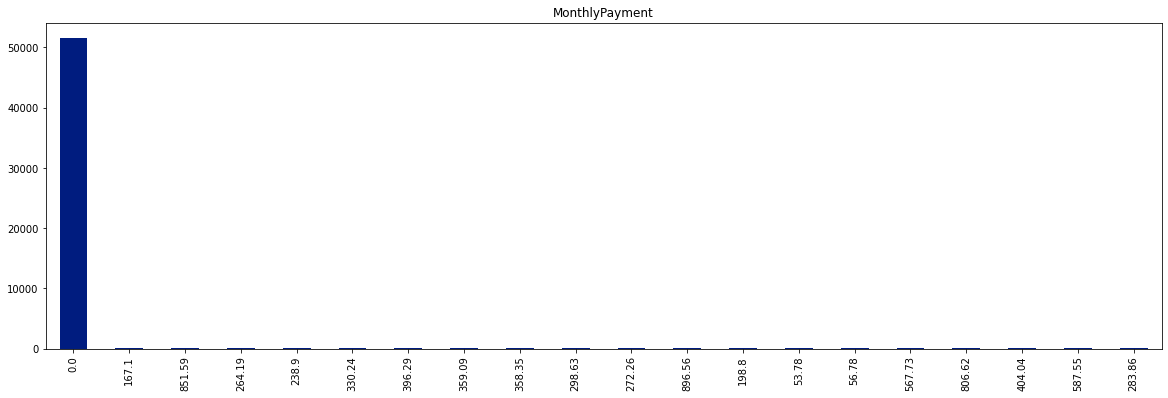

,index,MonthlyPayment
0,0.00,68.07%
1,167.10,0.12%
2,851.59,0.12%
3,264.19,0.11%
4,238.90,0.11%
5,330.24,0.11%
6,396.29,0.11%
7,359.09,0.09%
8,358.35,0.08%
9,298.63,0.08%


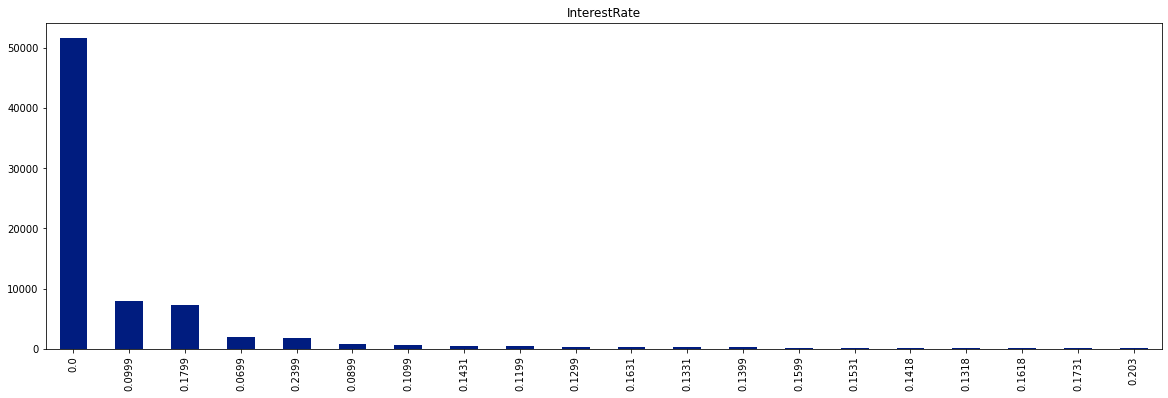

,index,InterestRate
0,0.0000,68.07%
1,0.0999,10.51%
2,0.1799,9.58%
3,0.0699,2.51%
4,0.2399,2.31%
5,0.0899,1.12%
6,0.1099,0.91%
7,0.1431,0.6%
8,0.1199,0.52%
9,0.1299,0.38%


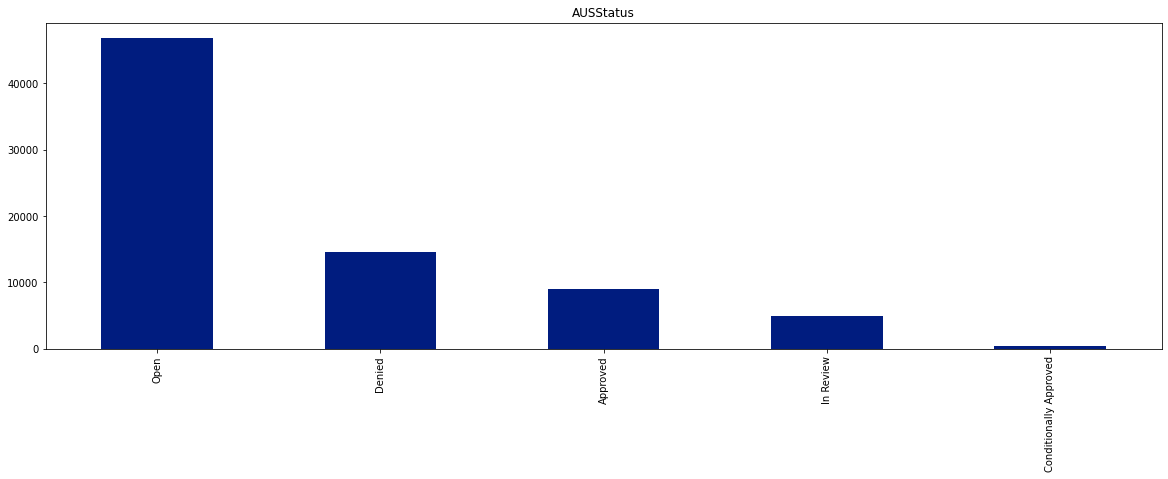

,index,AUSStatus
0,Open,61.83%
1,Denied,19.23%
2,Approved,11.87%
3,In Review,6.49%
4,Conditionally Approved,0.59%


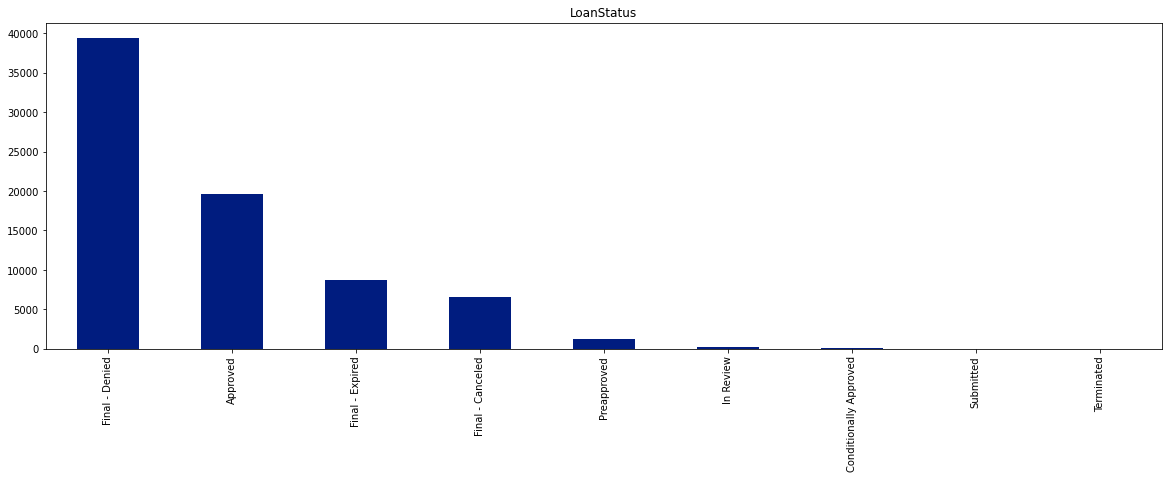

,index,LoanStatus
0,Final - Denied,52.02%
1,Approved,25.9%
2,Final - Expired,11.49%
3,Final - Canceled,8.66%
4,Preapproved,1.65%
5,In Review,0.22%
6,Conditionally Approved,0.04%
7,Submitted,0.01%
8,Terminated,0.0%


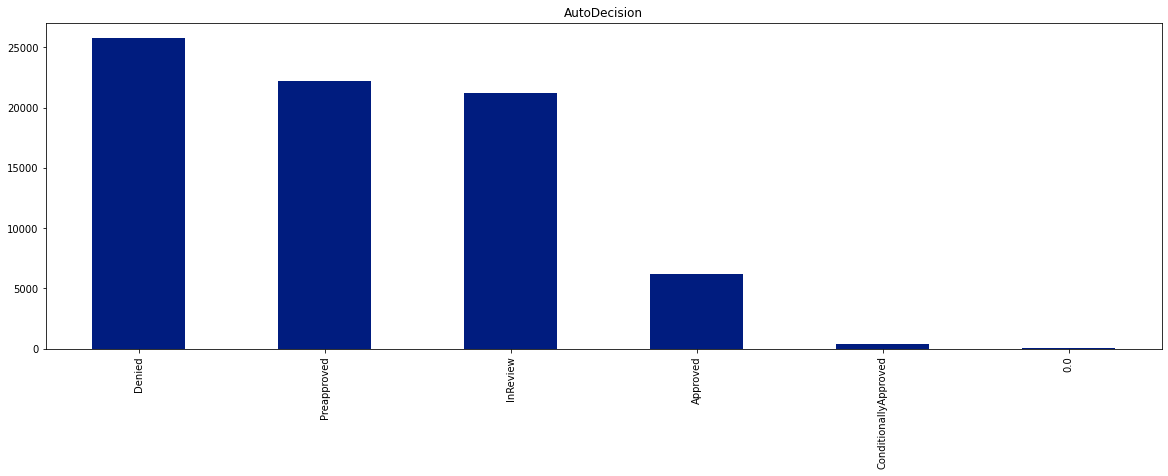

,index,AutoDecision
0,Denied,33.99%
1,Preapproved,29.3%
2,InReview,27.97%
3,Approved,8.19%
4,ConditionallyApproved,0.48%
5,0,0.07%


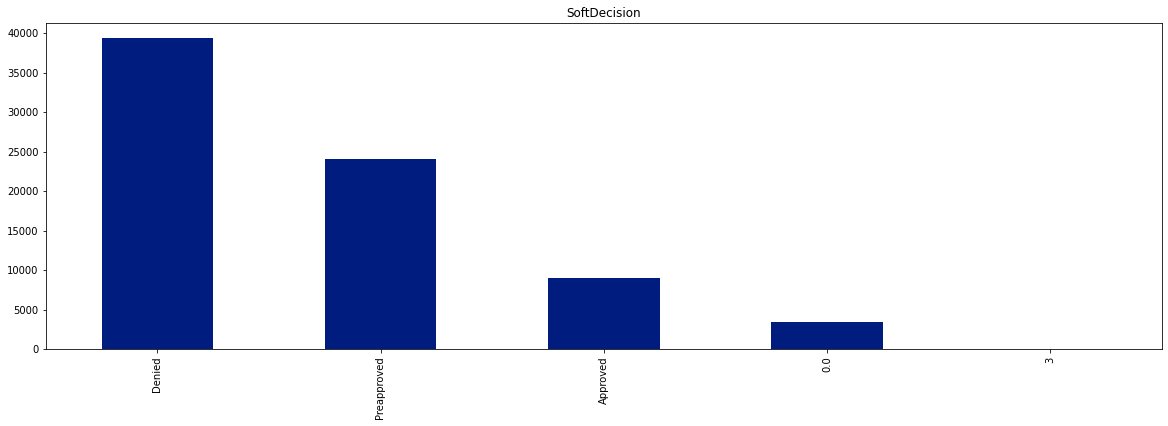

,index,SoftDecision
0,Denied,51.91%
1,Preapproved,31.7%
2,Approved,11.88%
3,0,4.5%
4,3,0.01%


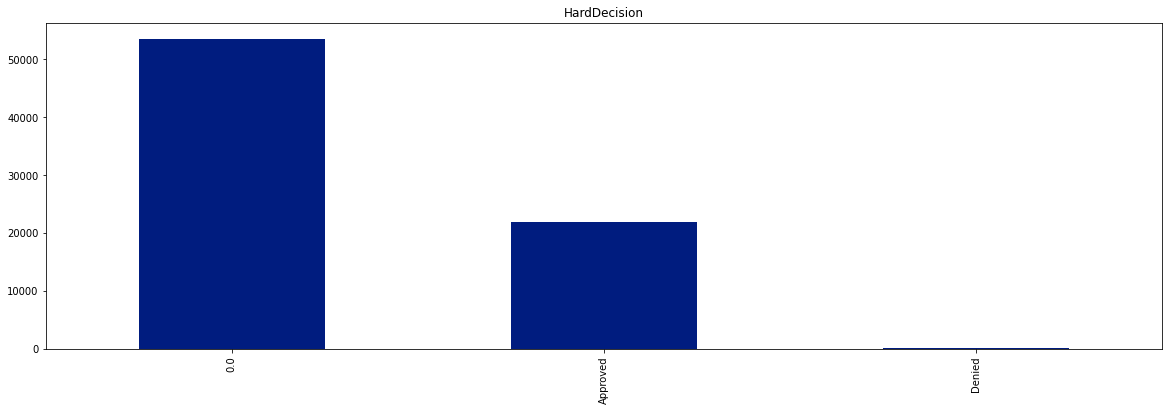

,index,HardDecision
0,0,70.78%
1,Approved,29.0%
2,Denied,0.22%


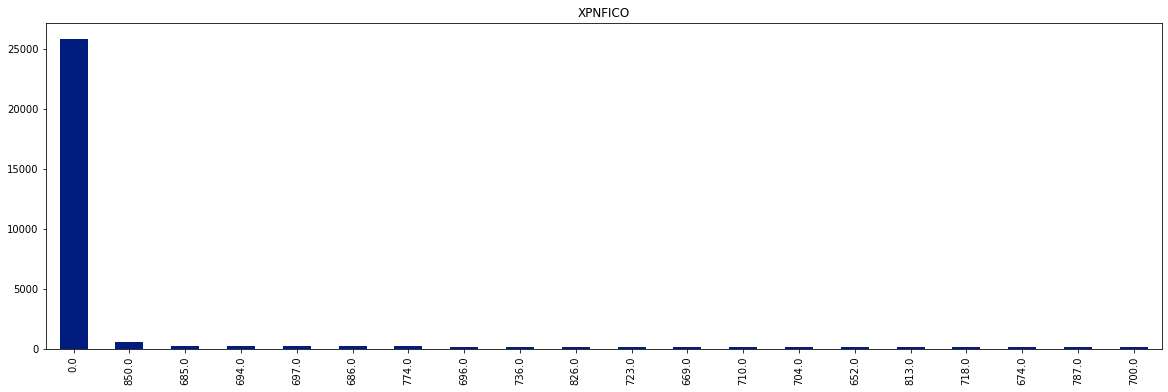

,index,XPNFICO
0,0.0,34.13%
1,850.0,0.78%
2,685.0,0.32%
3,694.0,0.31%
4,697.0,0.3%
5,686.0,0.3%
6,774.0,0.3%
7,696.0,0.29%
8,736.0,0.29%
9,826.0,0.28%


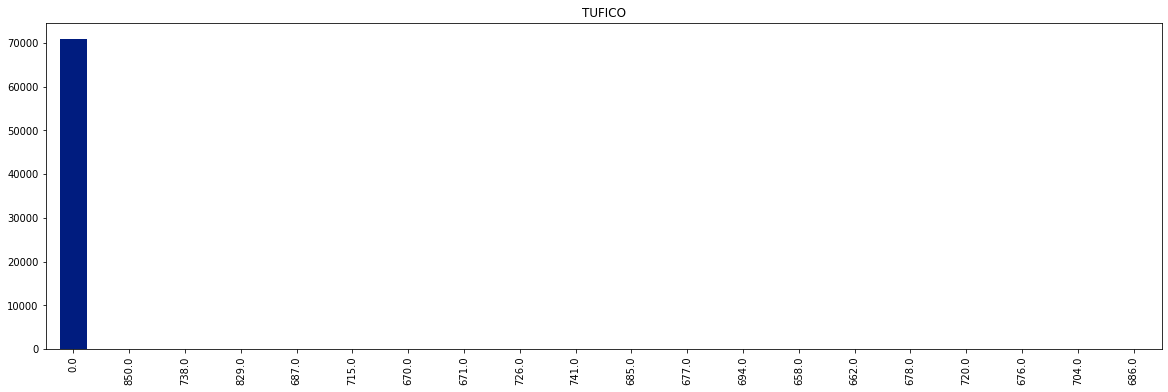

,index,TUFICO
0,0.0,93.72%
1,850.0,0.1%
2,738.0,0.05%
3,829.0,0.04%
4,687.0,0.04%
5,715.0,0.04%
6,670.0,0.04%
7,671.0,0.04%
8,726.0,0.04%
9,741.0,0.04%


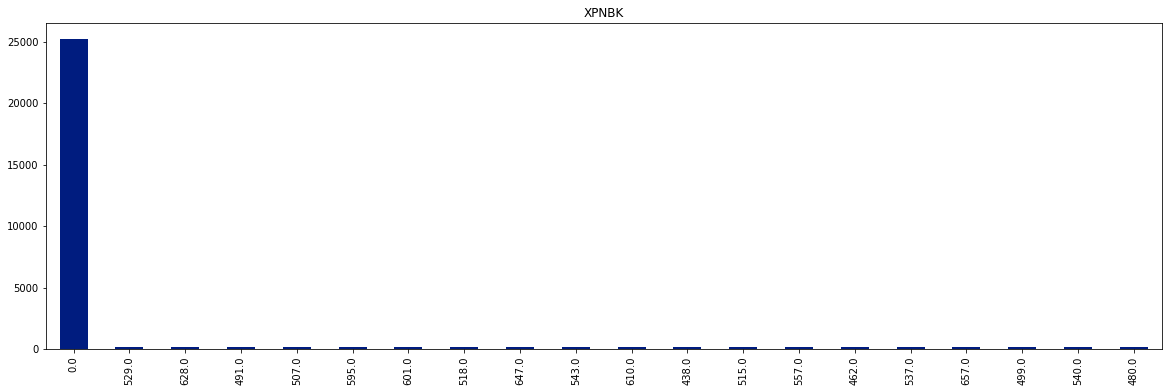

,index,XPNBK
0,0.0,33.36%
1,529.0,0.27%
2,628.0,0.26%
3,491.0,0.25%
4,507.0,0.25%
5,595.0,0.25%
6,601.0,0.24%
7,518.0,0.24%
8,647.0,0.24%
9,543.0,0.24%


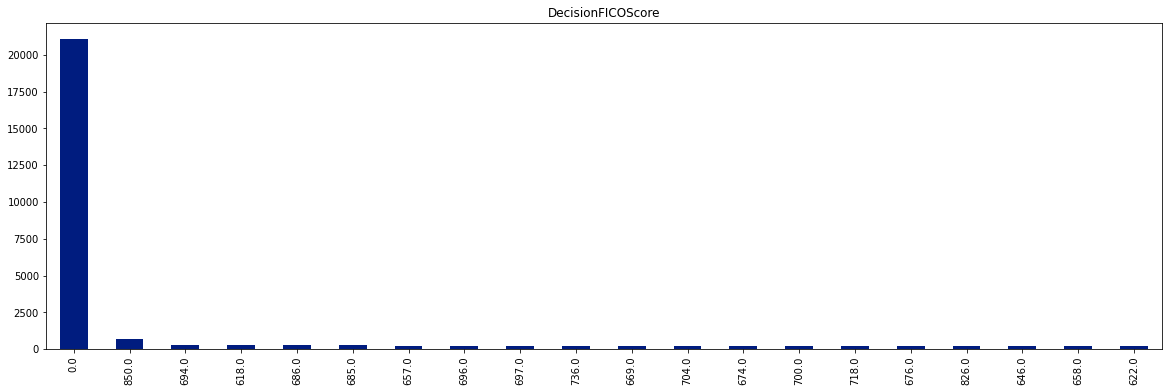

,index,DecisionFICOScore
0,0.0,27.86%
1,850.0,0.92%
2,694.0,0.35%
3,618.0,0.34%
4,686.0,0.34%
5,685.0,0.33%
6,657.0,0.32%
7,696.0,0.32%
8,697.0,0.31%
9,736.0,0.31%


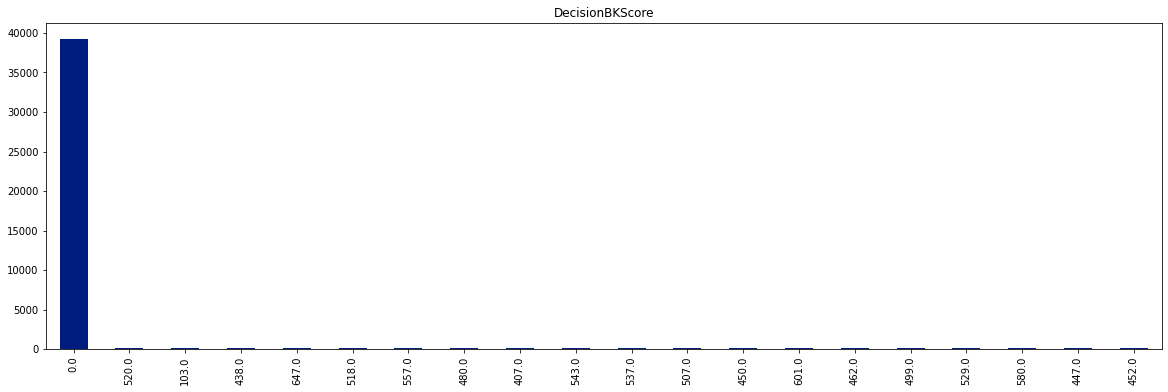

,index,DecisionBKScore
0,0.0,51.87%
1,520.0,0.16%
2,103.0,0.16%
3,438.0,0.16%
4,647.0,0.15%
5,518.0,0.15%
6,557.0,0.15%
7,480.0,0.15%
8,407.0,0.15%
9,543.0,0.15%


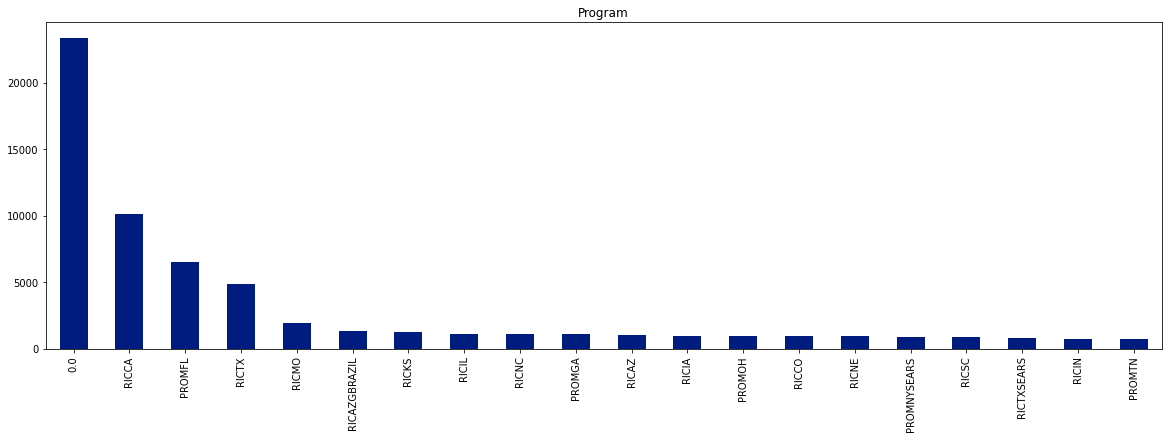

,index,Program
0,0,30.84%
1,RICCA,13.34%
2,PROMFL,8.6%
3,RICTX,6.45%
4,RICMO,2.52%
5,RICAZGBRAZIL,1.77%
6,RICKS,1.69%
7,RICIL,1.48%
8,RICNC,1.44%
9,PROMGA,1.44%


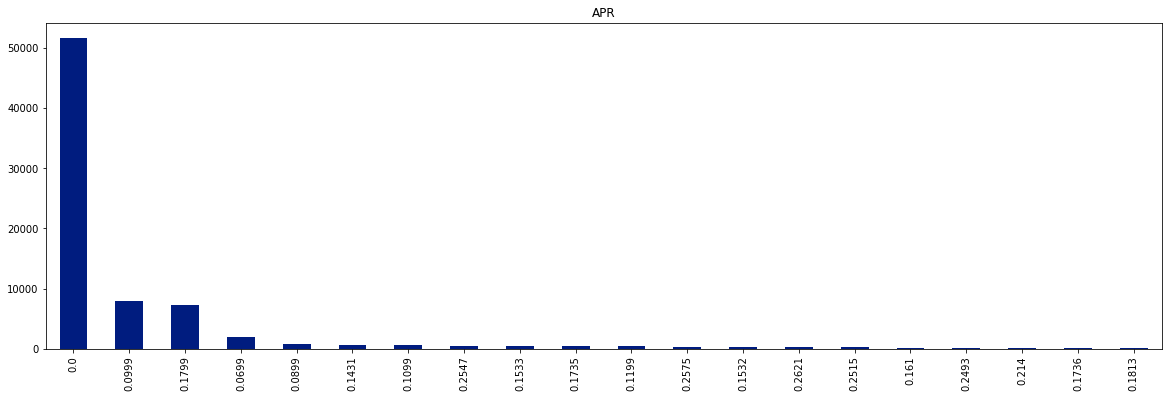

,index,APR
0,0.0000,68.07%
1,0.0999,10.43%
2,0.1799,9.58%
3,0.0699,2.51%
4,0.0899,1.12%
5,0.1431,0.92%
6,0.1099,0.91%
7,0.2547,0.62%
8,0.1533,0.57%
9,0.1735,0.53%


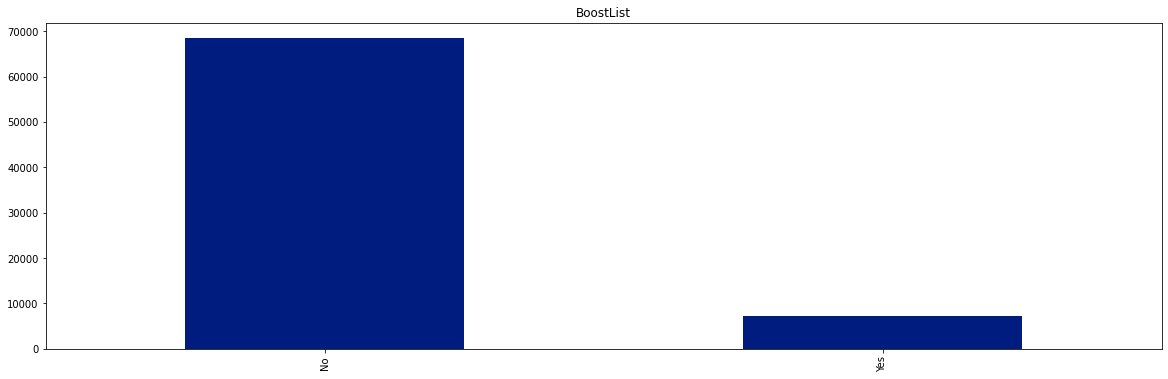

,index,BoostList
0,No,90.38%
1,Yes,9.62%


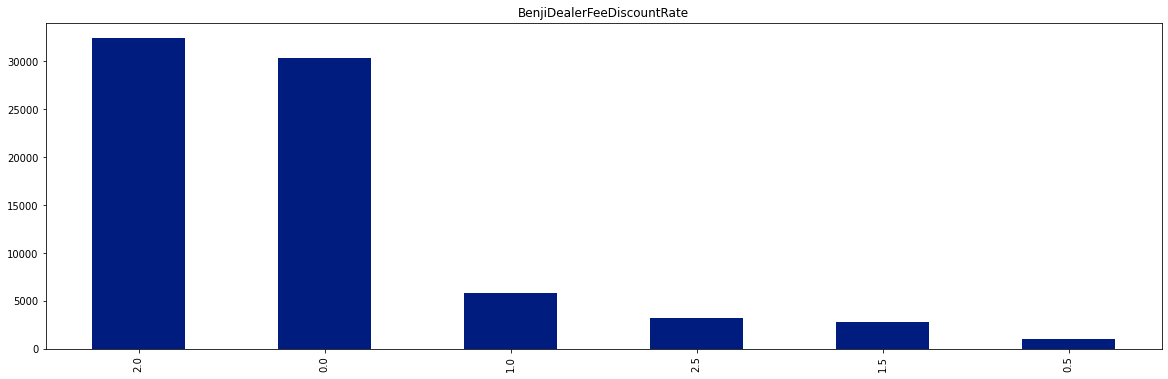

,index,BenjiDealerFeeDiscountRate
0,2.0,42.81%
1,0.0,40.12%
2,1.0,7.7%
3,2.5,4.26%
4,1.5,3.75%
5,0.5,1.36%


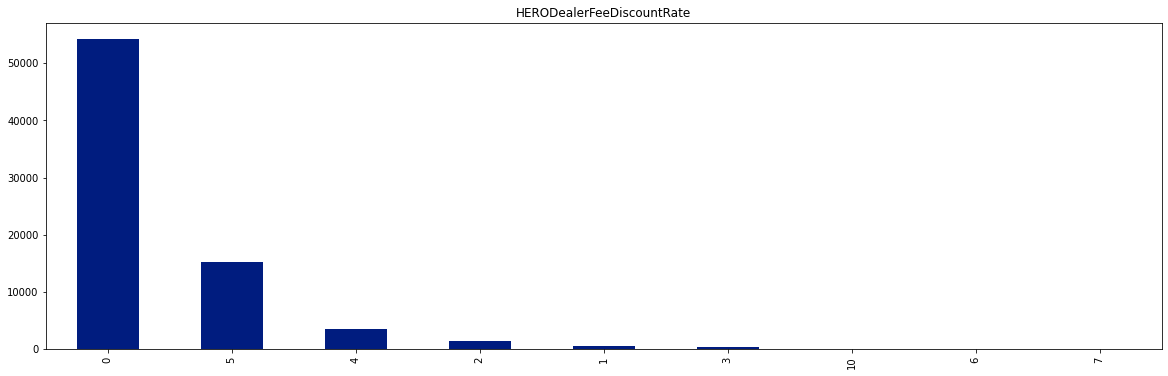

,index,HERODealerFeeDiscountRate
0,0,71.71%
1,5,20.2%
2,4,4.72%
3,2,1.87%
4,1,0.76%
5,3,0.51%
6,10,0.1%
7,6,0.08%
8,7,0.05%


In [90]:
ignore = ["ApplicantId","ApplicationDateDim","ApplicationDate","AutoDecisionDate", \
            "LoanId",'FundedDateDim', "ContractorOrganizationId", "Contrator User First Name",\
             "Contrator User Last Name","Contrator User Email", "Contrator User Phone", "ContractorKey", "ContractorJobNumber",\
            "ContractorNumber", "HEROAccountManagerId", "ContractorOrganizationName","ContractorTypeName",\
            "Contractor Applied Date", "Contractor Registration Date", "AccountStatusName", \
            "Contractor Effective Date", "UserId", "UserName"]
for i in sub_dataset.columns:
    
    if i in ignore:
        continue
        
    plt.figure(figsize=(20, 6))
    sub_dataset[i].value_counts().head(20).plot.bar()
    plt.title(i)
    plt.show()
    
    temp = sub_dataset[i].value_counts(normalize=True).mul(100).head(20).reset_index()
    temp[i] = round(temp[i], 2)
    temp[i] = temp[i].astype(str)+"%"
    display(temp)

In [12]:
other_features = ["XPNFICO", "TUFICO", "XPNBK",\
                 "DecisionFICOScore", "DecisionBKScore", "Program", "APR", "BoostList",\
                 "BenjiDealerFeeDiscountRate", "HERODealerFeeDiscountRate"]

## Make Data

In [78]:
columns = ["Mailing State", "EmploymentType", "AgeAtApplication", "StatedMonthlyIncome", "FinancialProduct",\
            "ApplicationDateDim", "ProjectType", "Property State", "RequestedAmount", "LoanTermInMonths", \
           "WhetherApplicantAvailLoanPreviously",
            "MonthlyPayment", "InterestRate", "AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"]

columns.extend(other_features)

sub_dataset = sub_dataset.fillna(0.0)

sub_dataset = sub_dataset[columns]

## Label Encoding

In [14]:
for i in ["Mailing State", "EmploymentType", "FinancialProduct", "ApplicationDateDim", "ProjectType", "Property State", \
         "Program", "BoostList"]:
    LAYER = pd.get_dummies(sub_dataset[i], prefix=i+"_")
    sub_dataset[LAYER.columns] = LAYER
    sub_dataset = sub_dataset.drop(columns=[i])
sub_dataset.head(5)

,AgeAtApplication,StatedMonthlyIncome,RequestedAmount,LoanTermInMonths,WhetherApplicantAvailLoanPreviously,MonthlyPayment,InterestRate,AUSStatus,LoanStatus,AutoDecision,...,Program__RICWA,Program__RICWASEARS,Program__RICWI,Program__RICWISEARS,Program__RICWV,Program__RICWVSEARS,Program__RICWY,Program__RICWaSEARS,BoostList__No,BoostList__Yes
0,70,14560.0,0.0,60.0,1,127.22,0.1799,Approved,Approved,Approved,...,0,0,0,0,0,0,0,0,1,0
1,72,7600.0,0.0,0.0,2,0.00,0.0000,Denied,Final - Denied,Denied,...,0,0,0,0,0,0,0,0,1,0
2,56,12000.0,0.0,60.0,1,631.77,0.1799,Approved,Approved,Approved,...,0,0,0,0,0,0,0,0,1,0
3,32,4400.0,0.0,0.0,2,0.00,0.0000,Open,Final - Denied,InReview,...,0,0,0,0,0,0,0,0,1,0
4,35,7100.0,0.0,60.0,1,268.87,0.1799,Open,Approved,Preapproved,...,0,0,0,0,0,0,0,0,1,0


In [15]:
dataset_ausstaus = sub_dataset[sub_dataset["AUSStatus"].isin(["Denied", "Approved"])][sub_dataset.columns]
Y_ausstatus = sub_dataset[sub_dataset["AUSStatus"].isin(["Denied", "Approved"])][["AUSStatus"]]
dataset_ausstaus = dataset_ausstaus.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

dataset_loan = sub_dataset[sub_dataset["LoanStatus"].isin(["Final - Denied","Approved", "Final - Expired", "Final - Canceled"])][sub_dataset.columns]
Y_loan_status = sub_dataset[sub_dataset["LoanStatus"].isin(["Final - Denied","Approved", "Final - Expired", "Final - Canceled"])][["LoanStatus"]]
dataset_loan = dataset_loan.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

dataset_auto_decision = sub_dataset[sub_dataset["AutoDecision"].isin(["Denied", "Approved"])][sub_dataset.columns]
Y_auto_decision = sub_dataset[sub_dataset["AutoDecision"].isin(["Denied", "Approved"])][["AutoDecision"]]
dataset_auto_decision = dataset_auto_decision.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

dataset_soft_decision = sub_dataset[sub_dataset["SoftDecision"].isin(["Denied", "Approved"])][sub_dataset.columns]
Y_soft_decision = sub_dataset[sub_dataset["SoftDecision"].isin(["Denied", "Approved"])][["SoftDecision"]]
dataset_soft_decision = dataset_soft_decision.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

dataset_hard_decision = sub_dataset[sub_dataset["HardDecision"].isin(["Denied", "Approved"])][sub_dataset.columns]
Y_hard_decision = sub_dataset[sub_dataset["HardDecision"].isin(["Denied", "Approved"])][["HardDecision"]]
dataset_hard_decision = dataset_hard_decision.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

## Machine Learning Technique

In [151]:
def trainMLAlgorithm(X, Y):    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y)
    
    # make Random Forest Classifier object
    forest = RandomForestClassifier(n_estimators=500,random_state=1)
    
    # Train Algo on training data
    forest.fit(X_train, y_train)
    
    # Predict target for testing data
    y_pred = forest.predict(X_test)
    
    print("Classification Report")
    confusion_report = classification_report(y_test, y_pred)
    print(confusion_report)
    
    print("\nConfusion Matrix")
    confusion_attack = confusion_matrix(y_test, y_pred)
    print(confusion_attack)
    
    plt.figure(figsize=(18,8))
    feat_impts = [] 
    # calculating features
    feat_impts.append(forest.feature_importances_)
    # ploting features using
    (pd.Series(np.mean(feat_impts, axis=0), index=X.columns)
       .nlargest(49)
       .plot(kind='bar'))
    
    plt.show()

<center><h2>Loan Approval Detection</h2></center>

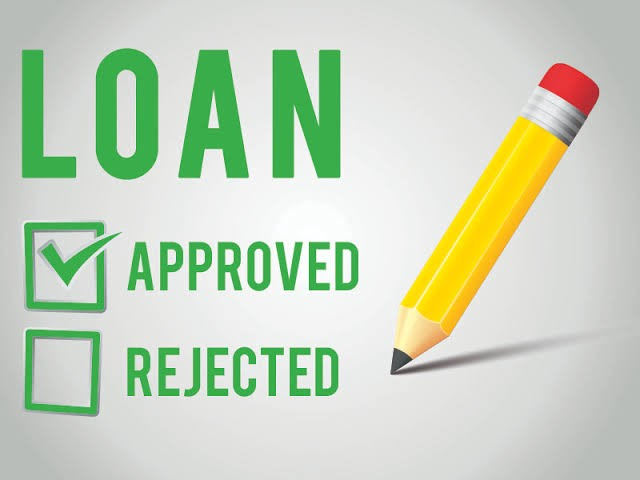

## AUSStatus Detection using Machine Learning Based on Features

Classification Report
              precision    recall  f1-score   support

    Approved       0.99      0.98      0.98      2697
      Denied       0.98      0.99      0.99      4369

    accuracy                           0.99      7066
   macro avg       0.99      0.99      0.99      7066
weighted avg       0.99      0.99      0.99      7066


Confusion Matrix
[[2630   67]
 [  22 4347]]


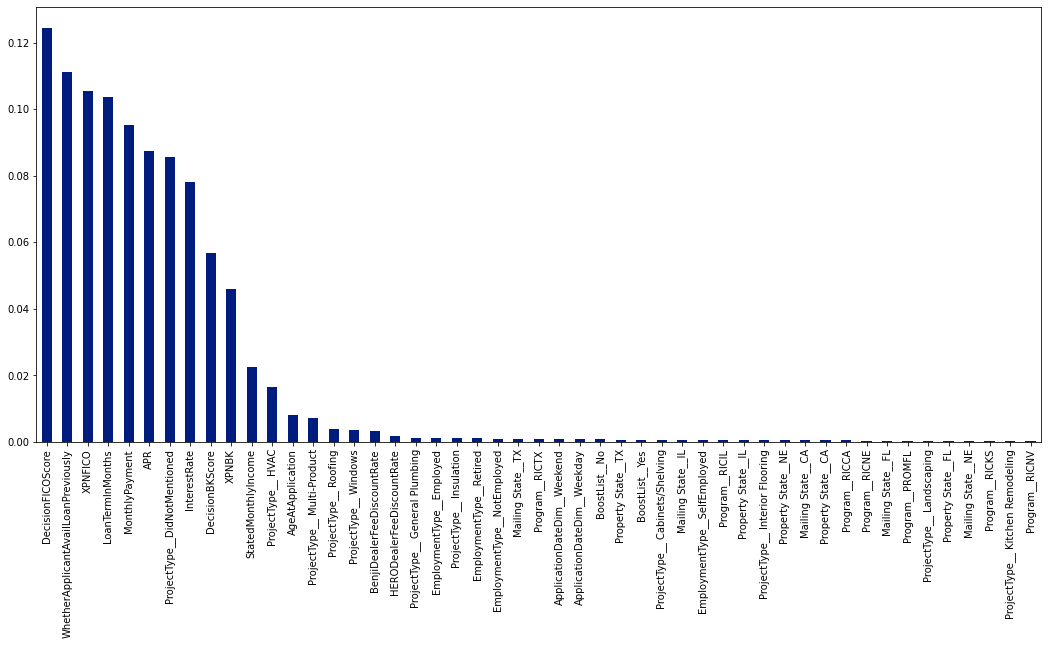

In [17]:
trainMLAlgorithm(dataset_ausstaus, Y_ausstatus)

## LoanStatus Detection using Machine Learning Based on Features

Classification Report
                  precision    recall  f1-score   support

        Approved       0.92      0.99      0.95      5886
Final - Canceled       0.58      0.41      0.48      1969
  Final - Denied       0.90      0.95      0.93     11821
 Final - Expired       0.63      0.48      0.54      2612

        accuracy                           0.86     22288
       macro avg       0.76      0.71      0.73     22288
    weighted avg       0.84      0.86      0.85     22288


Confusion Matrix
[[ 5844    12     0    30]
 [  178   816   574   401]
 [   24   208 11287   302]
 [  319   364   683  1246]]


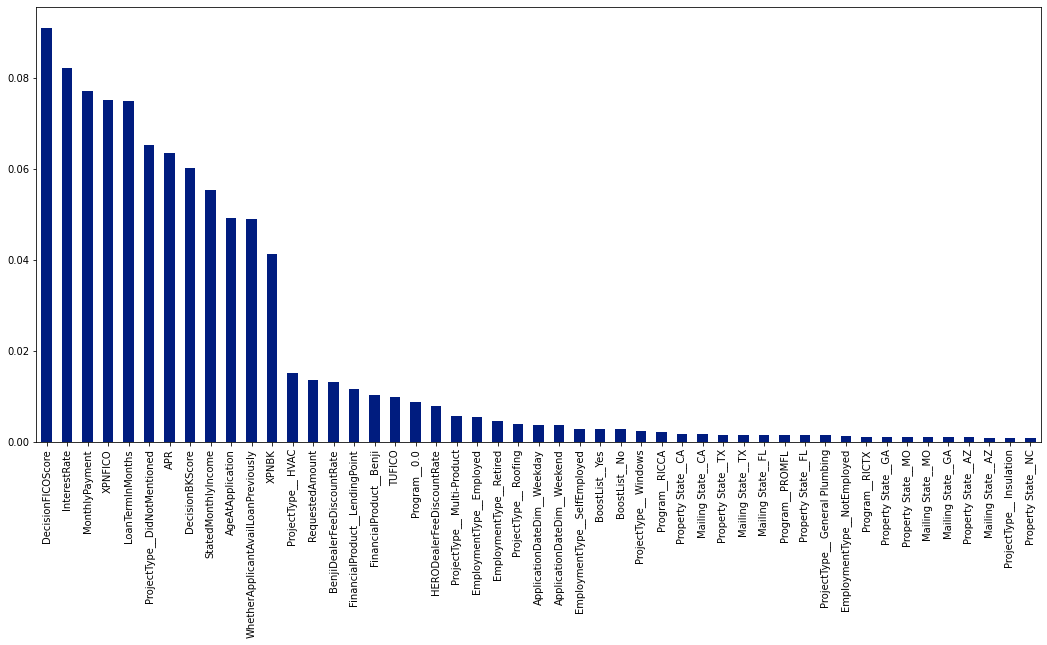

In [18]:
trainMLAlgorithm(dataset_loan, Y_loan_status)

## AutoDecision Detection using Machine Learning Based on Features

Classification Report
              precision    recall  f1-score   support

    Approved       0.99      0.98      0.98      1861
      Denied       0.99      1.00      1.00      7724

    accuracy                           0.99      9585
   macro avg       0.99      0.99      0.99      9585
weighted avg       0.99      0.99      0.99      9585


Confusion Matrix
[[1821   40]
 [  20 7704]]


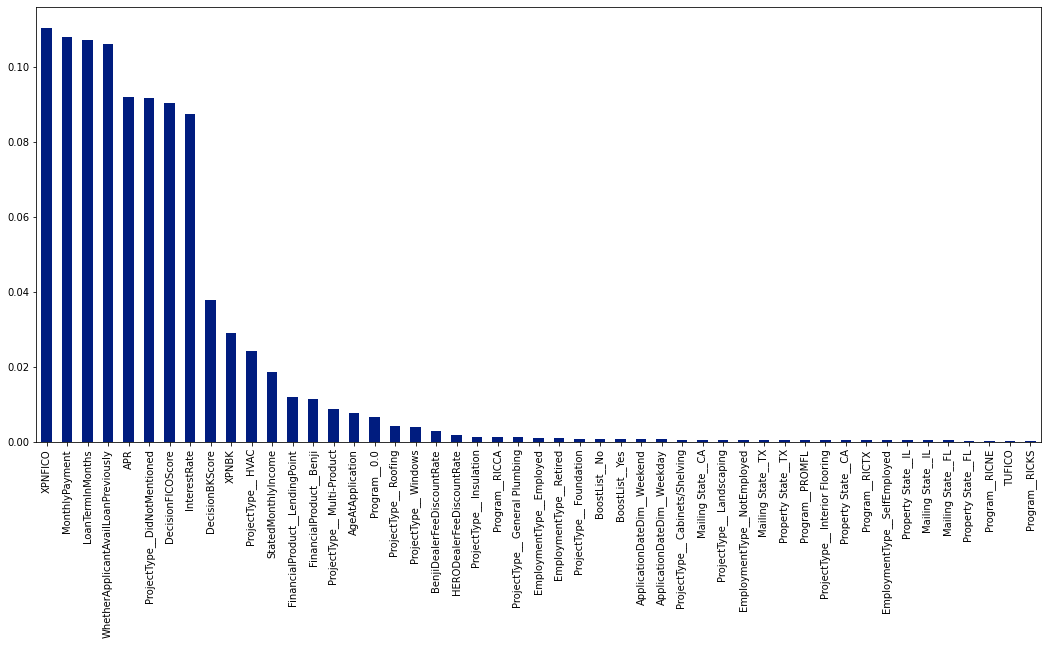

In [19]:
trainMLAlgorithm(dataset_auto_decision, Y_auto_decision)

## SoftDecision Detection using Machine Learning Based on Features

Classification Report
              precision    recall  f1-score   support

    Approved       0.99      0.97      0.98      2700
      Denied       0.99      1.00      1.00     11796

    accuracy                           0.99     14496
   macro avg       0.99      0.98      0.99     14496
weighted avg       0.99      0.99      0.99     14496


Confusion Matrix
[[ 2619    81]
 [   35 11761]]


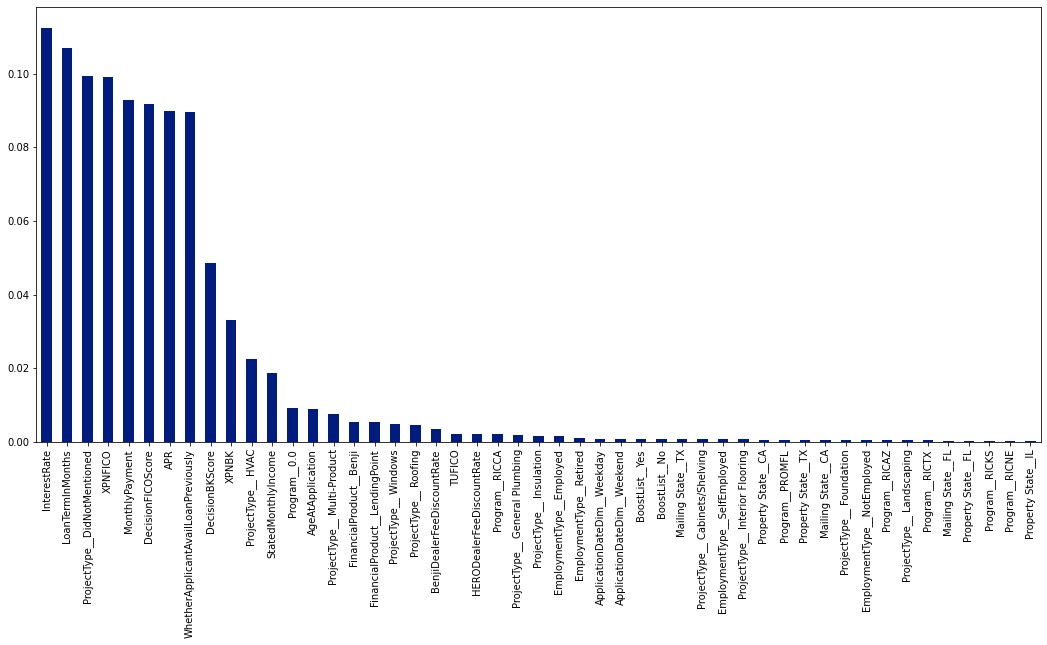

In [20]:
trainMLAlgorithm(dataset_soft_decision, Y_soft_decision)

## HardDecision Detection using Machine Learning Based on Features

Classification Report
              precision    recall  f1-score   support

    Approved       0.99      1.00      1.00      6591
      Denied       0.94      0.30      0.45        50

    accuracy                           0.99      6641
   macro avg       0.97      0.65      0.73      6641
weighted avg       0.99      0.99      0.99      6641


Confusion Matrix
[[6590    1]
 [  35   15]]


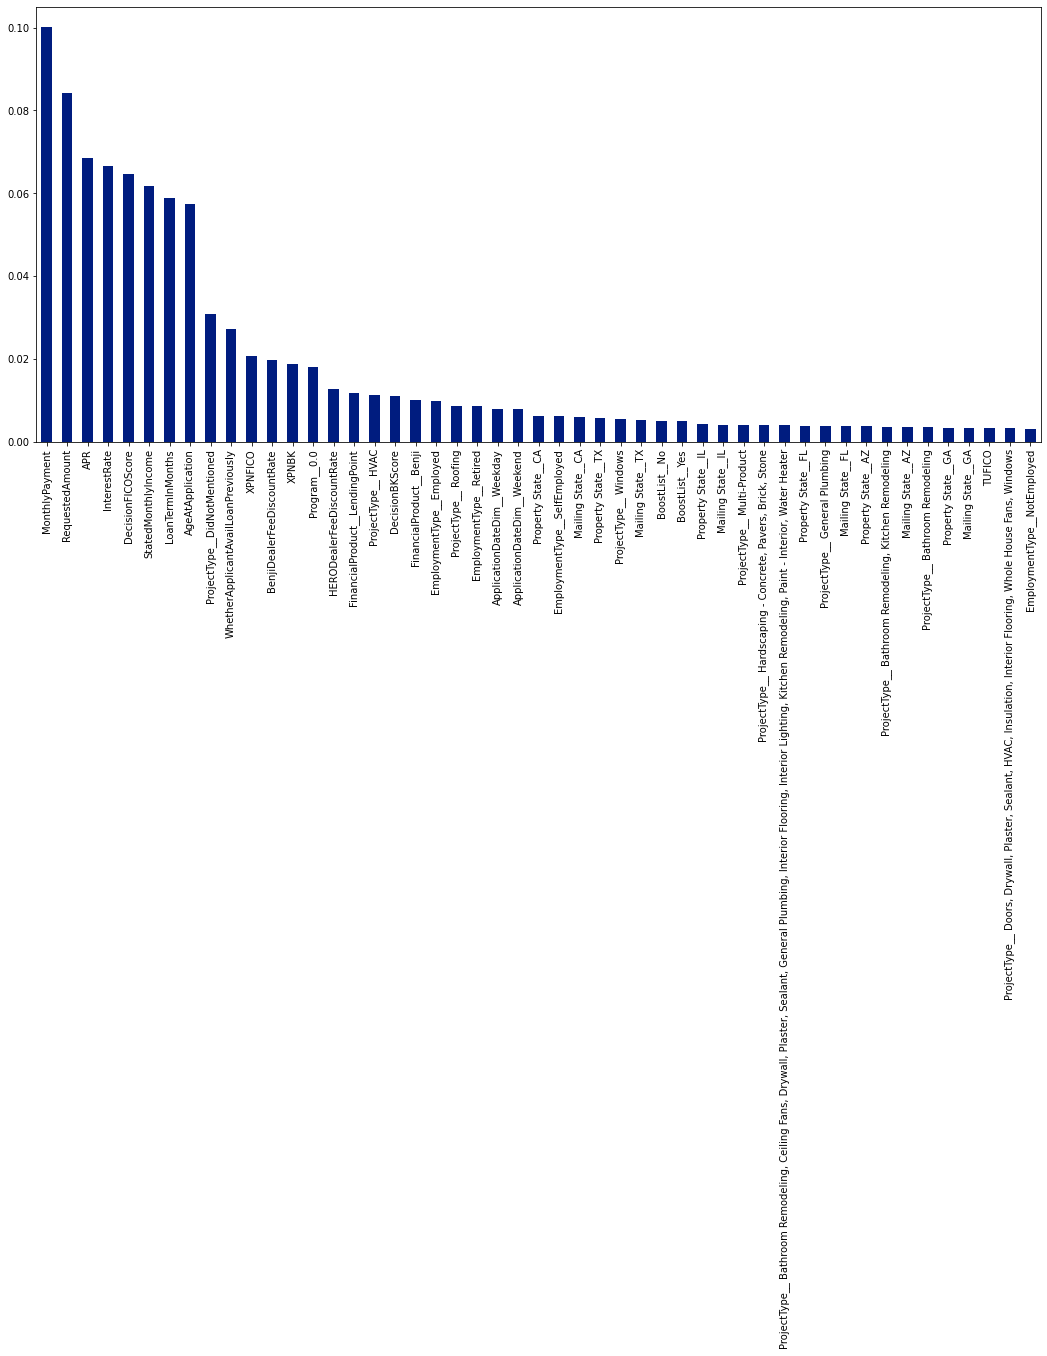

In [21]:
trainMLAlgorithm(dataset_hard_decision, Y_hard_decision)

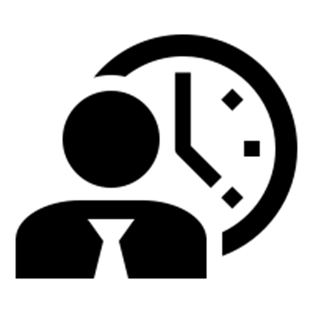

## Loan Approval Duration Prediction

- In how many days after application submition, loan can be approved or rejected

In [153]:
duration = data[data["LoanStatus"] == "Approved"][["ApplicantId","ApplicationDate", "HardDecisionDate"]]
duration = duration.dropna()
duration["DaysToApproveLoan"] = (pd.to_datetime(duration["HardDecisionDate"]) - pd.to_datetime(duration["ApplicationDate"])).dt.days
duration.loc[duration["DaysToApproveLoan"] == 0, "DaysToApproveLoan"] = 1

In [154]:
dataset_loan_reg = dataset_loan.copy()
dataset_loan_reg["ApplicantId"] = data["ApplicantId"]
dataset_loan_reg = dataset_loan_reg.merge(duration[["ApplicantId", "DaysToApproveLoan"]], on="ApplicantId", how="left")
dataset_loan_reg["DaysToApproveLoan"] = dataset_loan_reg["DaysToApproveLoan"].fillna(0)

In [155]:
Y_time = dataset_loan_reg[["DaysToApproveLoan"]]
X = dataset_loan_reg.drop(columns=["ApplicantId", "DaysToApproveLoan"])

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_time, test_size=0.30)

# make Random Forest Classifier object
model = RandomForestRegressor(n_estimators=500, random_state=1)

# Train Algo on training data
model.fit(X_train, y_train)

# Predict target for testing data
y_pred = model.predict(X_test)

import math
mse = mean_squared_error(y_test, y_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
rsqrt = r2_score(y_test, y_pred)
print('R-Squared: '+str(rsqrt))

MSE: 82.78938213020636
MAE: 2.9586823049500435
RMSE: 9.098867079488873
R-Squared: -0.2564216174639844


NameError: name 'feat_impts' is not defined

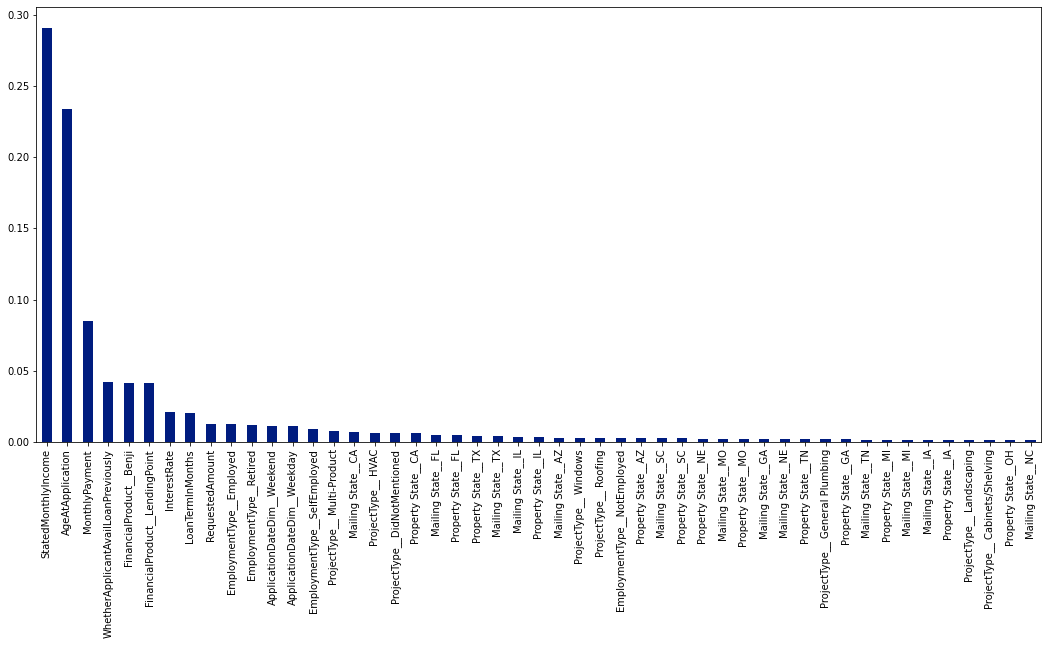

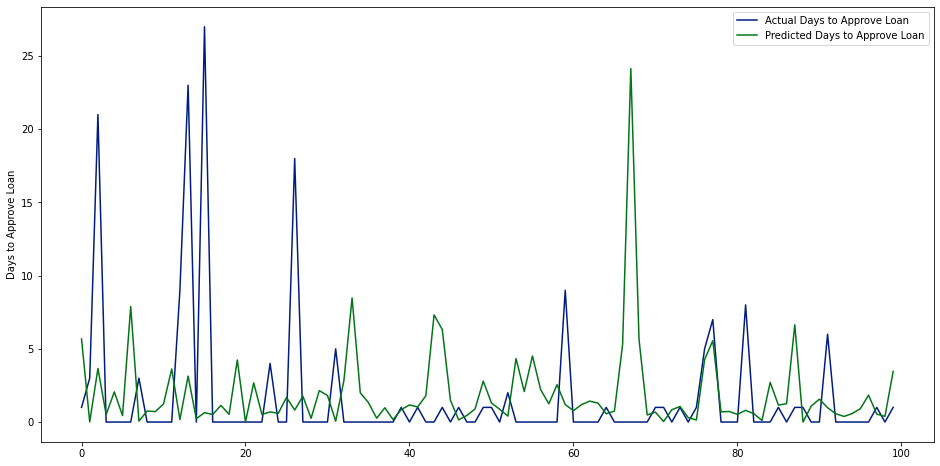

In [158]:
plt.figure(figsize=(18,8))
feat_impts = [] 

# calculating features
feat_impts.append(model.feature_importances_)
(pd.Series(np.mean(feat_impts, axis=0), index=X.columns)
       .nlargest(49)
       .plot(kind='bar'))  
plt.show()
    
    
fig = plt.figure(figsize=(16,8))
a = [i for i in range(len(y_test))]
L = 0
H = 100
plt.plot(a[L:H], y_test[L:H], label='Actual Days to Approve Loan')
plt.plot(a[L:H], y_pred[L:H], label='Predicted Days to Approve Loan')
plt.legend()
plt.ylabel("Days to Approve Loan")
plt.show()

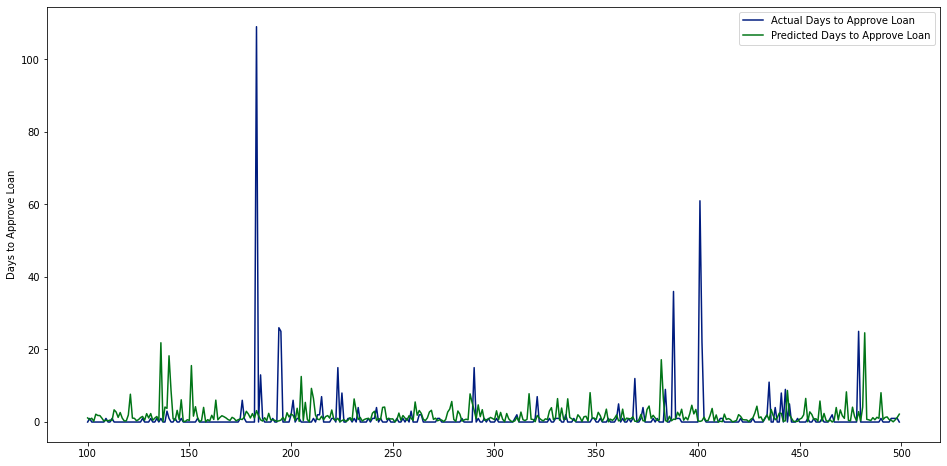

In [159]:
fig = plt.figure(figsize=(16,8))
a = [i for i in range(len(y_test))]
L = 100
H = 500
plt.plot(a[L:H], y_test[L:H], label='Actual Days to Approve Loan')
plt.plot(a[L:H], y_pred[L:H], label='Predicted Days to Approve Loan')
plt.legend()
plt.ylabel("Days to Approve Loan")
plt.show()

In [167]:
dataset_loan_reg["DaysToApproveLoan"].value_counts()

0.0      55073
1.0      12119
2.0       1143
3.0        859
4.0        586
5.0        501
6.0        461
7.0        340
8.0        245
9.0        196
13.0       173
10.0       173
14.0       171
12.0       162
15.0       144
11.0       141
21.0       119
16.0       106
20.0       106
17.0       100
18.0        84
28.0        77
29.0        70
19.0        67
25.0        65
27.0        62
26.0        59
22.0        58
23.0        57
24.0        49
         ...  
155.0        1
121.0        1
128.0        1
157.0        1
159.0        1
170.0        1
156.0        1
164.0        1
202.0        1
178.0        1
192.0        1
150.0        1
188.0        1
196.0        1
237.0        1
216.0        1
208.0        1
205.0        1
149.0        1
145.0        1
225.0        1
132.0        1
116.0        1
165.0        1
123.0        1
101.0        1
112.0        1
213.0        1
190.0        1
142.0        1
Name: DaysToApproveLoan, Length: 171, dtype: int64

In [181]:
# dataset_loan_reg[dataset_loan_reg["FinancialProduct__Benji"] == 1].mean()
# dataset_loan_reg[dataset_loan_reg["FinancialProduct__LendingPoint"] == 1].mean()

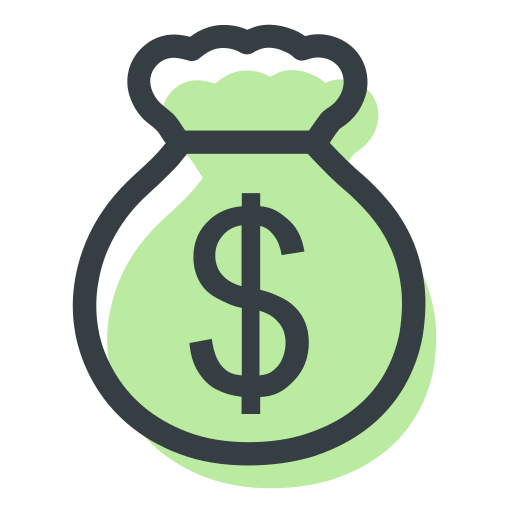

## How much loan will be funded?

In [187]:
loan = data[["ApplicantId","LoanAmount"]]
dataset_loan_amount = dataset_loan_reg.merge(loan, on="ApplicantId", how="left")
dataset_loan_amount["LoanAmount"] = dataset_loan_amount["LoanAmount"].fillna(0)

In [188]:
Y_amount = dataset_loan_amount[["LoanAmount"]]
X = dataset_loan_amount.drop(columns=["ApplicantId", "LoanAmount", "DaysToApproveLoan"])

MSE: 55380809.465182945
MAE: 5468.475177012533
RMSE: 7441.828368430903
R-Squared: -0.15764032697325892


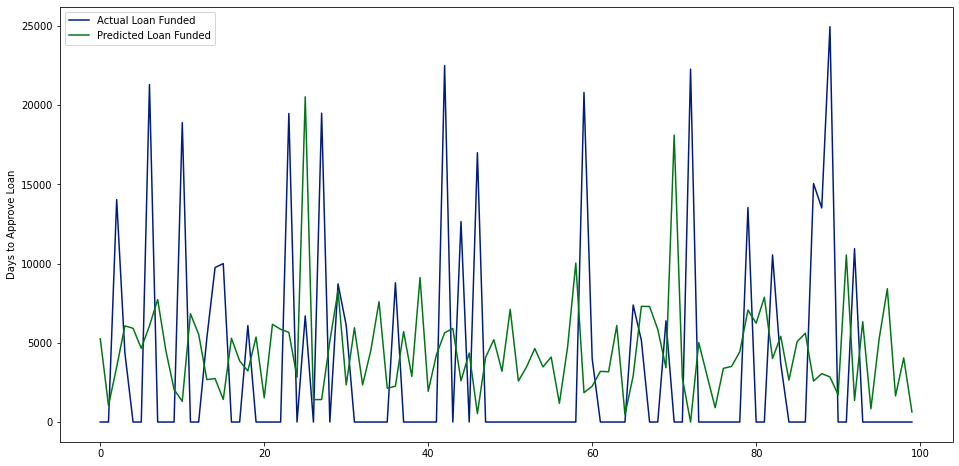

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_amount, test_size=0.30)

# make Random Forest Classifier object
model = RandomForestRegressor(n_estimators=500, random_state=1)

# Train Algo on training data
model.fit(X_train, y_train)

# Predict target for testing data
y_pred = model.predict(X_test)

import math
mse = mean_squared_error(y_test, y_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
rsqrt = r2_score(y_test, y_pred)
print('R-Squared: '+str(rsqrt))

fig = plt.figure(figsize=(16,8))
a = [i for i in range(len(y_test))]
L = 0
H = 100
plt.plot(a[L:H], y_test[L:H], label='Actual Loan Funded')
plt.plot(a[L:H], y_pred[L:H], label='Predicted Loan Funded')
plt.legend()
plt.ylabel("Days to Approve Loan")
plt.show()

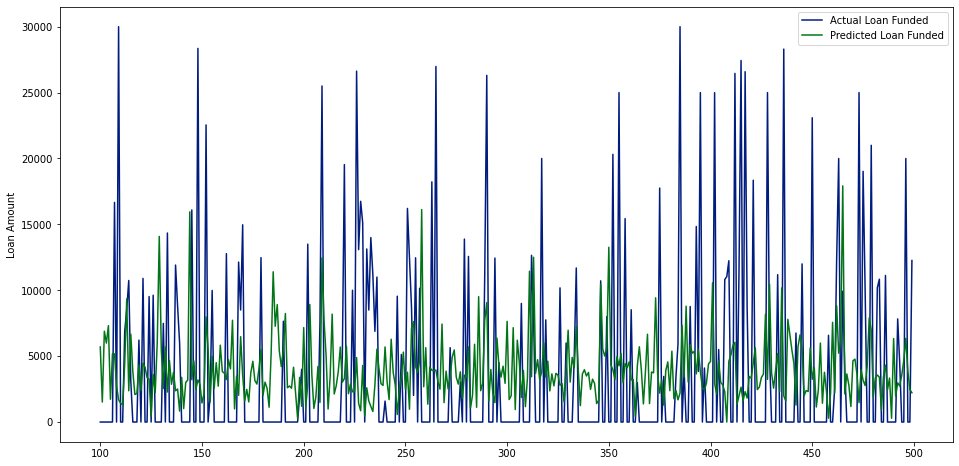

In [192]:
fig = plt.figure(figsize=(16,8))
a = [i for i in range(len(y_test))]
L = 100
H = 500
plt.plot(a[L:H], y_test[L:H], label='Actual Loan Funded')
plt.plot(a[L:H], y_pred[L:H], label='Predicted Loan Funded')
plt.legend()
plt.ylabel("Loan Amount")
plt.show()

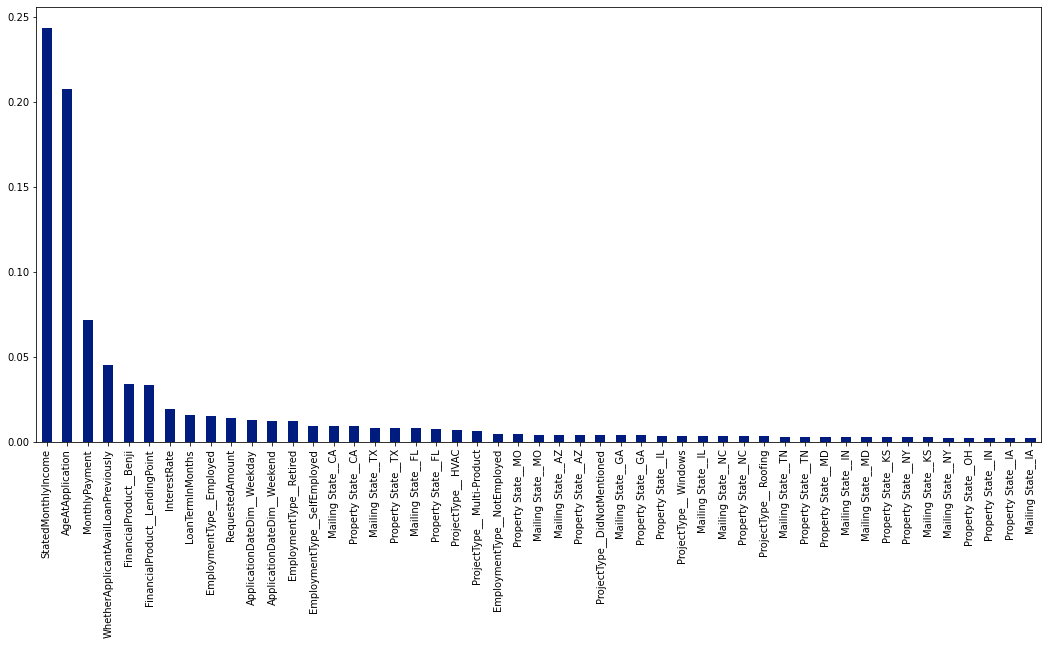

In [191]:
plt.figure(figsize=(18,8))
feat_impts = [] 

# calculating features
feat_impts.append(model.feature_importances_)
(pd.Series(np.mean(feat_impts, axis=0), index=X.columns)
       .nlargest(49)
       .plot(kind='bar'))  
plt.show()

## Build models to provide forecast the total number of applications in a time frame like for  next months.

In [221]:
def nextMonth(model, X):
    next_month = []
    last_rec = list(X[-1])
    new_rec = None
    for i in range(0, 30):
        if new_rec is None:
            new_rec = last_rec
        else:
            new_rec = last_rec[1:]
            new_rec.append(next_month[i-1])
        res = round(model.predict([new_rec])[0])
        next_month.append(res)
        last_rec = new_rec
    return sum(next_month)

In [222]:
data["MonthYear"] = pd.to_datetime(data["ApplicationDate"]).dt.strftime('%Y-%m')
data = data.sort_values(by="MonthYear")

In [223]:
applicant_per_month = data[["ApplicantId", "ApplicationDate"]].groupby(["ApplicationDate"]).count().reset_index()

In [224]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=30):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [225]:
X, y = create_dataset(applicant_per_month["ApplicantId"].values.reshape(-1, 1))

In [226]:
X_train, X_test = X[0:int(0.7*len(X))], X[int(0.7*len(X)):]
y_train, y_test = y[0:int(0.7*len(y))], y[int(0.7*len(y)):]

y_axis = applicant_per_month["ApplicationDate"].values
y_axis = y_axis[int(0.73*len(y_axis)):]

y_axis.shape, y_test.shape

((88,), (88,))

### Linear Regression

ROC AUC score: 0.82
RMSE =  39.063634945237304
R2 Score =  0.8168710152000416
MAE =  30.160469258788382


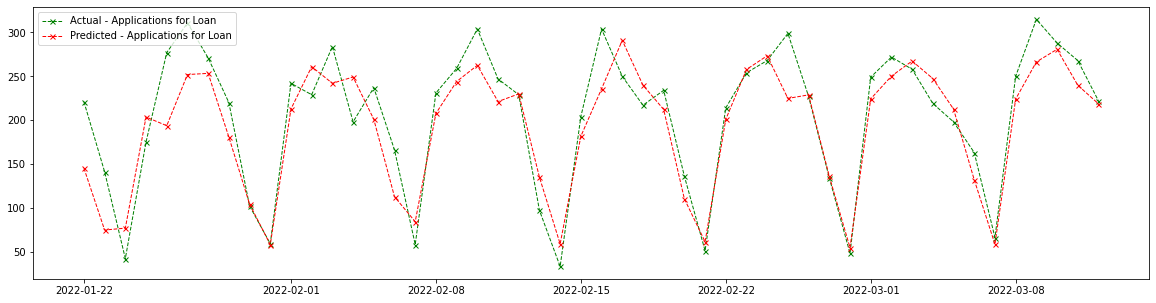

In [227]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print('ROC AUC score: {:.2f}'.format(score))

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE = ", rmse)
print("R2 Score = ", r2_score(y_test, y_pred))
print("MAE = ", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(20,5))
plt.plot(y_axis[0:50], y_test[0:50], '--gx', markersize = 5 , linewidth = 1, label="Actual - Applications for Loan")
plt.plot(y_axis[0:50], y_pred[0:50], '--rx', markersize = 5 , linewidth = 1, label="Predicted - Applications for Loan")
plt.legend()

### Random Forest Regressor

ROC AUC score: 0.79
RMSE =  42.162271807861586
R2 Score =  0.786666140833993
MAE =  32.62327272727273


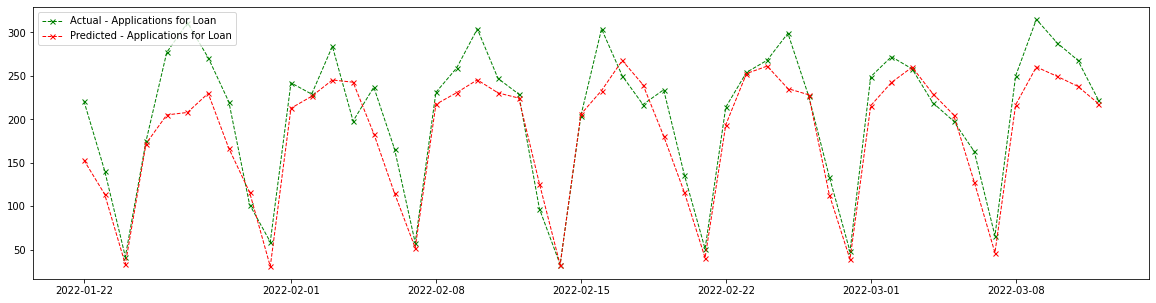

In [228]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print('ROC AUC score: {:.2f}'.format(score))

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE = ", rmse)
print("R2 Score = ", r2_score(y_test, y_pred))
print("MAE = ", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(20,5))
plt.plot(y_axis[0:50], y_test[0:50], '--gx', markersize = 5 , linewidth = 1, label="Actual - Applications for Loan")
plt.plot(y_axis[0:50], y_pred[0:50], '--rx', markersize = 5 , linewidth = 1, label="Predicted - Applications for Loan")
plt.legend()

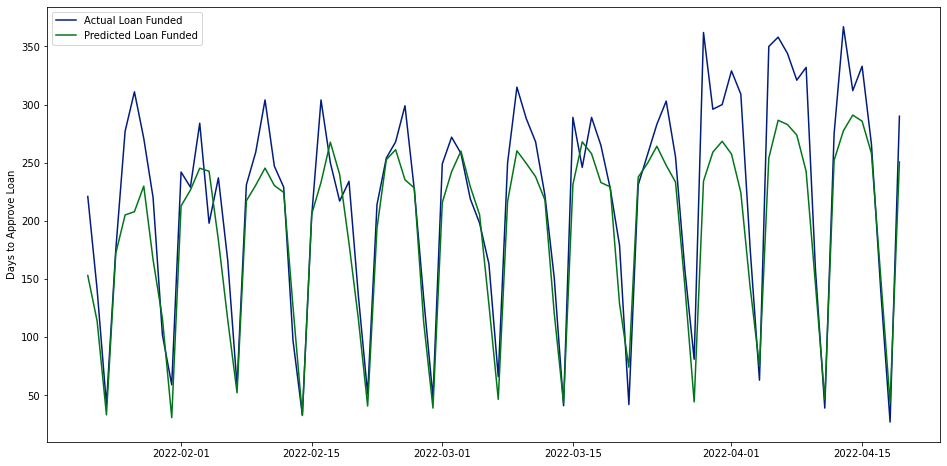

In [229]:
fig = plt.figure(figsize=(16,8))
a = [i for i in range(len(y_test))]
L = 0
H = 500
plt.plot(y_axis[L:H], y_test[L:H], label='Actual Loan Funded')
plt.plot(y_axis[L:H], y_pred[L:H], label='Predicted Loan Funded')
plt.legend()
plt.ylabel("Days to Approve Loan")
plt.show()

In [230]:
print("Applications Next Month")
nextMonth(model, X)

Applications Next Month


6973.0

## Build models to provide forecast the total number of applications that will Approve in a time frame like for  next months.

In [231]:
applicant_approved = data[["ApplicationDate", "LoanStatus"]].groupby(["ApplicationDate"]).LoanStatus.value_counts().unstack(fill_value=0).reset_index()
applicant_approved = applicant_approved[["ApplicationDate","Approved"]]
applicant_approved.head(5)

LoanStatus,ApplicationDate,Approved
0,2021-06-01,90
1,2021-06-02,91
2,2021-06-03,100
3,2021-06-04,89
4,2021-06-05,49


### Linear Regression

ROC AUC score: 0.80
RMSE =  13.576126580862423
R2 Score =  0.7989501117222652
MAE =  10.547023567273966


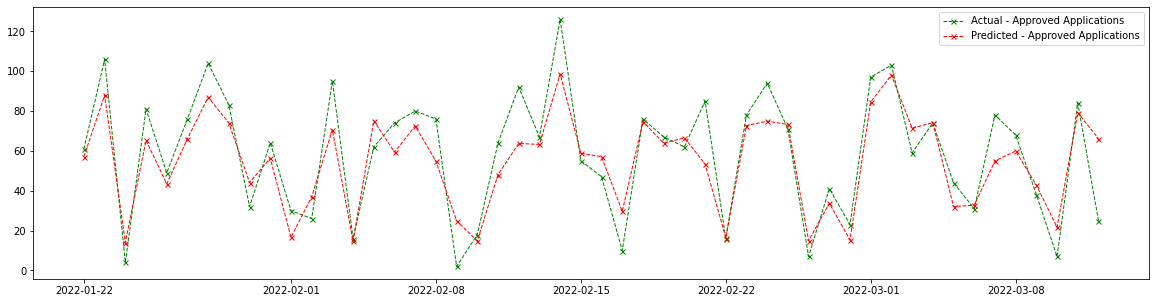

In [232]:
X, y = create_dataset(applicant_approved["Approved"].values.reshape(-1, 1))

X_train, X_test = X[0:int(0.7*len(X))], X[int(0.7*len(X)):]
y_train, y_test = y[0:int(0.7*len(y))], y[int(0.7*len(y)):]

y_axis = applicant_per_month["ApplicationDate"].values
y_axis = y_axis[int(0.73*len(y_axis)):]

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print('ROC AUC score: {:.2f}'.format(score))

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE = ", rmse)
print("R2 Score = ", r2_score(y_test, y_pred))
print("MAE = ", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(20,5))
plt.plot(y_axis[0:50], y_test[0:50], '--gx', markersize = 5 , linewidth = 1, label="Actual - Approved Applications")
plt.plot(y_axis[0:50], y_pred[0:50], '--rx', markersize = 5 , linewidth = 1, label="Predicted - Approved Applications")
plt.legend()

### Random Forest Regressor

ROC AUC score: 0.80
RMSE =  13.386893182919968
R2 Score =  0.8045157938225418
MAE =  9.909545454545453


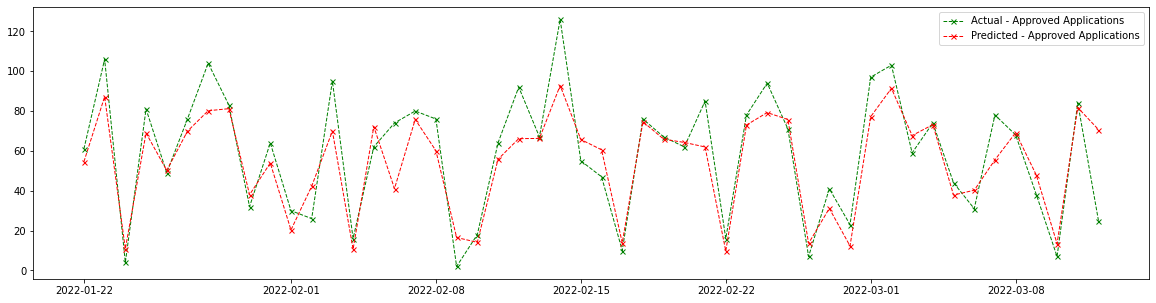

In [233]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print('ROC AUC score: {:.2f}'.format(score))

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE = ", rmse)
print("R2 Score = ", r2_score(y_test, y_pred))
print("MAE = ", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(20,5))
plt.plot(y_axis[0:50], y_test[0:50], '--gx', markersize = 5 , linewidth = 1, label="Actual - Approved Applications")
plt.plot(y_axis[0:50], y_pred[0:50], '--rx', markersize = 5 , linewidth = 1, label="Predicted - Approved Applications")
plt.legend()

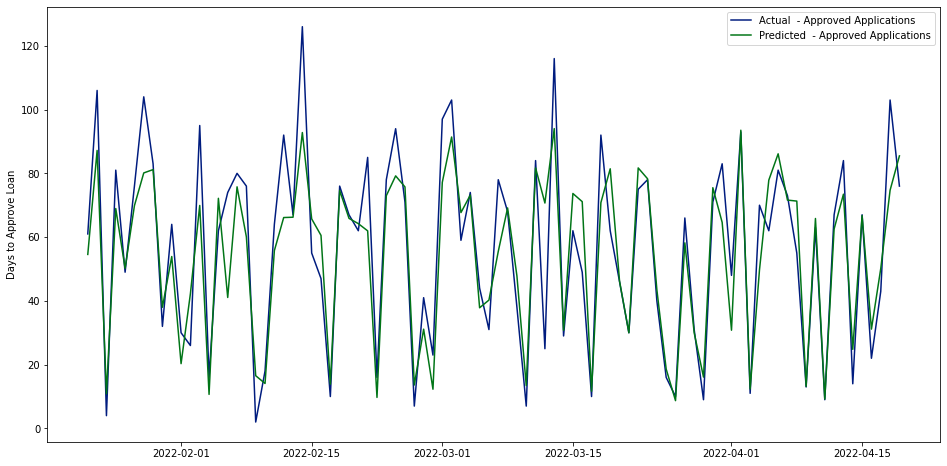

In [234]:
fig = plt.figure(figsize=(16,8))
a = [i for i in range(len(y_test))]
L = 0
H = 500
plt.plot(y_axis[L:H], y_test[L:H], label='Actual  - Approved Applications')
plt.plot(y_axis[L:H], y_pred[L:H], label='Predicted  - Approved Applications')
plt.legend()
plt.ylabel("Days to Approve Loan")
plt.show()

In [235]:
print("Applications Next Month")
nextMonth(model, X)

Applications Next Month


1694.0

## Build models to provide forecast the total Loan Amount in a time frame like for  next months.

In [236]:
loan_approved = data[["ApplicationDate", "LoanAmount"]].groupby(["ApplicationDate"]).sum().reset_index()
loan_approved.head(5)

,ApplicationDate,LoanAmount
0,2021-06-01,1305069.27
1,2021-06-02,1474012.56
2,2021-06-03,1469719.40
3,2021-06-04,1375278.22
4,2021-06-05,855077.73


ROC AUC score: 0.70
RMSE =  216899.9026781381
R2 Score =  0.6997753067480497
MAE =  169494.00835977282


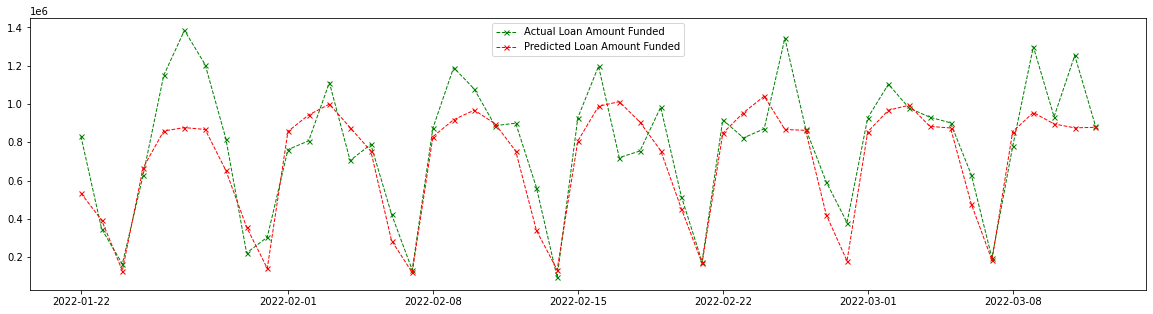

In [237]:
X, y = create_dataset(loan_approved["LoanAmount"].values.reshape(-1, 1))

X_train, X_test = X[0:int(0.7*len(X))], X[int(0.7*len(X)):]
y_train, y_test = y[0:int(0.7*len(y))], y[int(0.7*len(y)):]

y_axis = applicant_per_month["ApplicationDate"].values
y_axis = y_axis[int(0.73*len(y_axis)):]

model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print('ROC AUC score: {:.2f}'.format(score))

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE = ", rmse)
print("R2 Score = ", r2_score(y_test, y_pred))
print("MAE = ", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(20,5))
plt.plot(y_axis[0:50], y_test[0:50], '--gx', markersize = 5 , linewidth = 1, label="Actual Loan Amount Funded")
plt.plot(y_axis[0:50], y_pred[0:50], '--rx', markersize = 5 , linewidth = 1, label="Predicted Loan Amount Funded")
plt.legend()

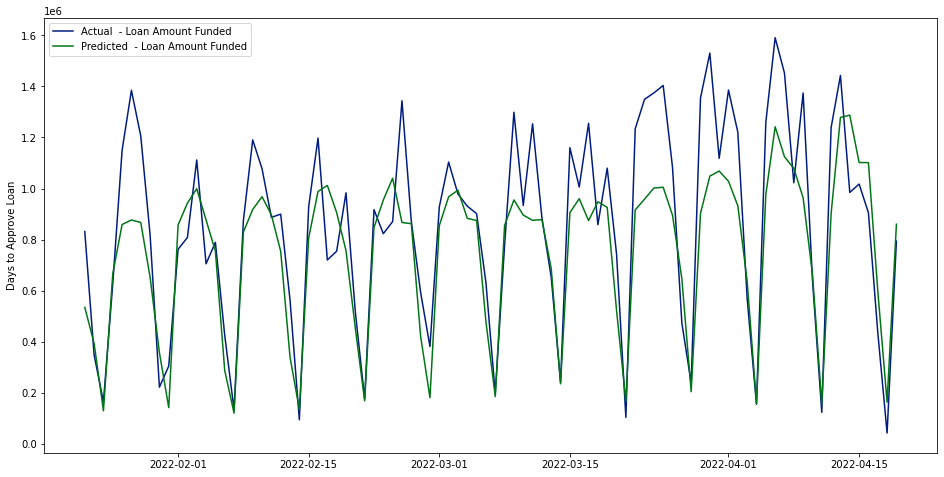

In [238]:
fig = plt.figure(figsize=(16,8))
a = [i for i in range(len(y_test))]
L = 0
H = 500
plt.plot(y_axis[L:H], y_test[L:H], label='Actual  - Loan Amount Funded')
plt.plot(y_axis[L:H], y_pred[L:H], label='Predicted  - Loan Amount Funded')
plt.legend()
plt.ylabel("Days to Approve Loan")
plt.show()

In [241]:
print("Applications Next Month")
nextMonth(model, X)
data["Month"] = pd.to_datetime(data["ApplicationDate"]).dt.month
data[["Month","LoanAmount"]].groupby(["Month"]).sum()

Applications Next Month


,LoanAmount
Month,
1,20765264.99
2,21561284.22
3,29534897.14
4,16487268.83
6,38462967.86
7,37097092.89
8,31455291.61
9,27543917.19
10,23847083.12


<center><h2>Anamoly/ Fraud Detection - Contractor</h2></center>

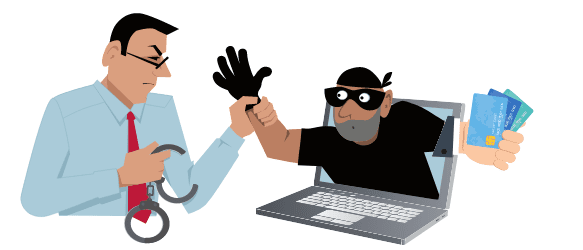

## Contractor Fraud

In this module, we will identify anomalies in contractors, these anomalies may or may not be fraud, but this makes contractor unique from others.

In [46]:
print(features)

['ApplicantId', 'Mailing State', 'EmploymentType', 'AgeAtApplication', 'StatedMonthlyIncome', 'FrozenBureaus', 'XPNFICO', 'TUFICO', 'XPNBK', 'FinancialProduct', 'ApplicationDateDim', 'ProjectType', 'Property State', 'RequestedAmount', 'DecisionFICOScore', 'DecisionBKScore', 'AUSStatus', 'AutoDecision', 'ApplicationDate', 'AutoDecisionDate', 'SoftDecision', 'HardDecision', 'MaxOfferAmount', 'LoanId', 'LoanStatus', 'LoanStage', 'LoanAmount', 'LoanTermInMonths', 'MonthlyPayment', 'Program', 'APR', 'InterestRate', 'FundedDateDim', 'NetFundedAmount', 'FinancingPlan', 'TotalFinanceCharge', 'GrossDealerFee', 'GrossDealerFeeRate', 'DiscountDealerFee', 'DiscountDealerFeeRate', 'NetDealerFee', 'NetDealerFeeRate', 'UWMonthlyDebtPayments', 'UWPreLoanDTI', 'UWPostLoanDTI', 'ContractorOrganizationId', 'ContractorId', 'Contrator User First Name', 'Contrator User Last Name', 'Contrator User Email', 'Contrator User Phone', 'ContractorKey', 'ContractorJobNumber', 'ContractorNumber', 'HEROAccountManagerI

In [91]:
contracter_data = data[["ContractorId"]].drop_duplicates()
temp = data[["ContractorId", "ApplicantId"]].groupby(["ContractorId"])["ApplicantId"].nunique().reset_index()
contracter_data = contracter_data.merge(temp, on="ContractorId", how="left")
contracter_data = contracter_data.rename(columns={"ApplicantId":"TotalApplicants"})
contracter_data.head(5)

,ContractorId,TotalApplicants
0,39390,103
1,35197,229
2,36028,9
3,39366,212
4,39358,186


In [92]:
sub_dataset["ContractorId"] = data["ContractorId"]
ContractorId = sub_dataset[["ContractorId", "LoanStatus"]].groupby(["ContractorId"]).LoanStatus.value_counts().unstack(fill_value=0).reset_index()
ContractorId = ContractorId[["ContractorId", "Approved", "Conditionally Approved","Final - Canceled", "Final - Denied"]]
contracter_data = contracter_data.merge(ContractorId, on="ContractorId", how="left")
contracter_data.head(5)

,ContractorId,TotalApplicants,Approved,Conditionally Approved,Final - Canceled,Final - Denied
0,39390,103,28,0,9,53
1,35197,229,70,0,18,107
2,36028,9,2,0,1,6
3,39366,212,53,0,16,113
4,39358,186,42,0,16,97


In [93]:
sub_dataset["NetFundedAmount"] = data["NetFundedAmount"]
temp = sub_dataset[["ContractorId", "NetFundedAmount"]].groupby(["ContractorId"]).mean().reset_index()
temp.columns = ["ContractorId", "NetFundedAmount_Avg"]
contracter_data = contracter_data.merge(temp, on="ContractorId", how="left")

In [94]:
temp = sub_dataset[sub_dataset["LoanStatus"] == "Approved"][["ContractorId", "NetFundedAmount"]].groupby(["ContractorId"]).min().reset_index()
temp.columns = ["ContractorId", "NetFundedAmount_Minimum"]
temp["NetFundedAmount_Minimum"] = temp["NetFundedAmount_Minimum"].fillna(0.0)
contracter_data = contracter_data.merge(temp, on="ContractorId", how="left")

In [95]:
temp = sub_dataset[["ContractorId", "NetFundedAmount"]].groupby(["ContractorId"]).max().reset_index()
temp.columns = ["ContractorId", "NetFundedAmount_Maximum"]
contracter_data = contracter_data.merge(temp, on="ContractorId", how="left")

In [96]:
temp = sub_dataset[["ContractorId", "NetFundedAmount"]].groupby(["ContractorId"]).sum().reset_index()
temp.columns = ["ContractorId", "NetFundedAmount_Total"]
contracter_data = contracter_data.merge(temp, on="ContractorId", how="left")

In [97]:
sub_dataset["ApplicationDate"] = data["ApplicationDate"]
sub_dataset["ApplicantId"] = data["ApplicantId"]
temp = sub_dataset[["ContractorId", "ApplicationDate", "ApplicantId"]].groupby(["ContractorId", "ApplicationDate"]).count().reset_index()
temp = temp[["ContractorId", "ApplicantId"]].groupby("ContractorId").mean().reset_index()
temp.columns = ["ContractorId", "Average_Applications_per_Day"]
contracter_data = contracter_data.merge(temp, on="ContractorId", how="left")

In [98]:
# Import date class from datetime module
from datetime import date

# Returns the current local date
today = date.today()

sub_dataset["Contractor Registration Date"] = data["Contractor Registration Date"]
temp = sub_dataset[["ContractorId","Contractor Registration Date"]]
temp = temp.drop_duplicates()
temp["TodaysDate"] = today
temp["BusinessAge"] = (pd.to_datetime(temp["TodaysDate"]) - pd.to_datetime(temp["Contractor Registration Date"])).dt.days/30
temp["BusinessAge"] = temp["BusinessAge"].astype(int)
contracter_data = contracter_data.merge(temp[["ContractorId","BusinessAge"]], on="ContractorId", how="left")

In [99]:
contracter_data["Applications_to_Approve_Ratio"] = contracter_data["TotalApplicants"] / contracter_data["Approved"]
contracter_data["Applications_to_Denied_Ratio"] = contracter_data["TotalApplicants"] / contracter_data["Final - Denied"]

contracter_data["Applications_to_Approve_Ratio"] = contracter_data["Applications_to_Approve_Ratio"].replace(math.inf, 0)
contracter_data["Applications_to_Denied_Ratio"] = contracter_data["Applications_to_Denied_Ratio"].replace(math.inf, 0)

contracter_data["Applications_to_Denied_Ratio"] = contracter_data["Applications_to_Denied_Ratio"]
contracter_data["Applications_to_Approve_Ratio"] = contracter_data["Applications_to_Approve_Ratio"]

In [100]:
contracter_data["Over_all_approved_ration"] = contracter_data["Approved"] / contracter_data["BusinessAge"]
contracter_data["Over_all_approved_ration"] = contracter_data["Over_all_approved_ration"].replace(math.inf, 0)

In [101]:
sub_dataset["Mailing State"] = data["Mailing State"]

temp = sub_dataset[["ContractorId", "Mailing State"]].groupby(["ContractorId"])["Mailing State"].nunique().reset_index()
temp.columns = ["ContractorId", "DealsInMoreThanOneState"]
temp.loc[temp["DealsInMoreThanOneState"] == 1, "DealsInMoreThanOneState"] = "No"
temp.loc[~temp["DealsInMoreThanOneState"].isin([1,"No"]), "DealsInMoreThanOneState"] = "Yes"
temp["DealsInMoreThanOneState"] = temp["DealsInMoreThanOneState"].replace("No", 0)
temp["DealsInMoreThanOneState"] = temp["DealsInMoreThanOneState"].replace("Yes", 1)

contracter_data = contracter_data.merge(temp[["ContractorId","DealsInMoreThanOneState"]], on="ContractorId", how="left")

temp["DealsInMoreThanOneState"].value_counts()

0    1585
1     322
Name: DealsInMoreThanOneState, dtype: int64

In [102]:
temp = data[["ContractorId", "ApplicationDate","ApplicantId"]].groupby(["ContractorId","ApplicationDate"]).ApplicantId.nunique().reset_index()
temp.columns= ["ContractorId", "ApplicationDate","No_of_Applicants_on_same_Day"]
t1 = temp[["ContractorId", "No_of_Applicants_on_same_Day"]].groupby("ContractorId").min().reset_index()
t1.columns = ["ContractorId", "Minimum_No_of_Applicants_on_same_Day"]
contracter_data = contracter_data.merge(t1, on="ContractorId", how="left")

t1 = temp[["ContractorId", "No_of_Applicants_on_same_Day"]].groupby("ContractorId").max().reset_index()
t1.columns = ["ContractorId", "Maximum_No_of_Applicants_on_same_Day"]
contracter_data = contracter_data.merge(t1, on="ContractorId", how="left")

t1 = temp[["ContractorId", "No_of_Applicants_on_same_Day"]].groupby("ContractorId").mean().reset_index()
t1.columns = ["ContractorId", "Average_No_of_Applicants_on_same_Day"]
contracter_data = contracter_data.merge(t1, on="ContractorId", how="left")

### Machine Learning Technique to identify Unique Contractors

In [103]:
from sklearn.ensemble import IsolationForest
contracter_data = contracter_data.fillna(0)
X = contracter_data.drop(columns=["ContractorId"])
clf = IsolationForest(n_estimators=500, random_state=0).fit(X)
contracter_data["Group"] = clf.predict(X)

In [104]:
contracter_data["Group"].value_counts()

 1    1773
-1     134
Name: Group, dtype: int64

## Contractors Different than Others

In [105]:
contracter_data[contracter_data["Group"] == -1].head(10)

,ContractorId,TotalApplicants,Approved,Conditionally Approved,Final - Canceled,Final - Denied,NetFundedAmount_Avg,NetFundedAmount_Minimum,NetFundedAmount_Maximum,NetFundedAmount_Total,Average_Applications_per_Day,BusinessAge,Applications_to_Approve_Ratio,Applications_to_Denied_Ratio,Over_all_approved_ration,DealsInMoreThanOneState,Minimum_No_of_Applicants_on_same_Day,Maximum_No_of_Applicants_on_same_Day,Average_No_of_Applicants_on_same_Day,Group
1,35197,229,70,0,18,107,8744.263810,2990.32,23002.50,183629.54,6.939394,45,3.271429,2.140187,1.555556,0,2,17,6.939394,-1
3,39366,212,53,0,16,113,10187.096154,1987.42,22546.37,662161.25,2.436782,16,4.000000,1.876106,3.312500,1,1,8,2.436782,-1
4,39358,186,42,0,16,97,12501.569286,11024.64,23002.50,350043.94,2.818182,16,4.428571,1.917526,2.625000,1,1,10,2.818182,-1
5,38400,830,239,0,70,421,13129.280459,4994.67,30000.00,2573338.97,4.048780,89,3.472803,1.971496,2.685393,1,1,15,4.048780,-1
6,32274,1638,447,2,134,856,10846.945942,840.54,58974.24,10423915.05,6.275862,61,3.664430,1.913551,7.327869,1,1,29,6.275862,-1
7,37183,1512,385,0,124,806,11578.521060,1865.26,47505.00,9610172.48,6.379747,32,3.927273,1.875931,12.031250,1,1,21,6.379747,-1
9,38065,726,178,1,58,385,12365.044171,1813.71,47505.00,4921287.58,3.882353,26,4.078652,1.885714,6.846154,1,1,17,3.882353,-1
12,28694,493,122,0,33,267,10979.375288,2024.07,28887.49,1141855.03,3.100629,89,4.040984,1.846442,1.370787,1,1,11,3.100629,-1
14,39638,201,52,0,19,103,15124.319846,4600.50,32383.84,983080.79,2.115789,12,3.865385,1.951456,4.333333,1,1,8,2.115789,-1
15,15465,238,59,0,22,130,3970.601071,1728.87,19576.80,444707.32,2.034188,99,4.033898,1.830769,0.595960,0,1,5,2.034188,-1


## Contractor (Majority Class)

In [106]:
contracter_data[contracter_data["Group"] == 1].head(10)

,ContractorId,TotalApplicants,Approved,Conditionally Approved,Final - Canceled,Final - Denied,NetFundedAmount_Avg,NetFundedAmount_Minimum,NetFundedAmount_Maximum,NetFundedAmount_Total,Average_Applications_per_Day,BusinessAge,Applications_to_Approve_Ratio,Applications_to_Denied_Ratio,Over_all_approved_ration,DealsInMoreThanOneState,Minimum_No_of_Applicants_on_same_Day,Maximum_No_of_Applicants_on_same_Day,Average_No_of_Applicants_on_same_Day,Group
0,39390,103,28,0,9,53,11204.673333,8920.37,18503.21,67228.04,2.395349,15,3.678571,1.943396,1.866667,0,2,6,2.395349,1
2,36028,9,2,0,1,6,4236.306667,4108.92,4300.00,12708.92,1.800000,40,4.500000,1.500000,0.050000,0,1,2,1.800000,1
8,32244,79,15,0,10,43,15244.199444,10168.33,24627.50,274395.59,2.468750,61,5.266667,1.837209,0.245902,0,1,8,2.468750,1
10,30440,85,25,0,10,39,9091.752041,4432.12,23627.50,445495.85,1.847826,69,3.400000,2.179487,0.362319,0,1,6,1.847826,1
11,38363,151,44,0,10,80,14045.463600,5781.07,35330.99,702273.18,2.126761,89,3.431818,1.887500,0.494382,1,1,8,2.126761,1
13,39635,28,7,0,1,18,11046.048571,7809.42,24502.50,154644.68,1.400000,12,4.000000,1.555556,0.583333,0,1,2,1.400000,1
16,39547,113,39,0,14,53,9658.568837,1511.00,20243.42,415318.46,1.982456,16,2.897436,2.132075,2.437500,1,1,10,1.982456,1
21,37996,39,5,0,2,27,4073.372941,4862.78,6301.24,69247.34,2.294118,27,7.800000,1.444444,0.185185,0,1,8,2.294118,1
23,37421,38,7,0,4,21,8223.560000,13689.64,14128.52,41117.80,2.000000,31,5.428571,1.809524,0.225806,0,1,4,2.000000,1
24,38254,138,32,0,9,83,10578.869773,3435.00,23738.94,465470.27,1.943662,25,4.312500,1.662651,1.280000,1,1,10,1.943662,1


In [71]:
contracter_data.to_csv("Contractors_data.csv", index=False)

In [135]:
df = pd.DataFrame()
df["Feature"] = contracter_data[contracter_data["Group"] == -1].mean().index
df["Outlier_Mean"] = contracter_data[contracter_data["Group"] == -1].mean().values
df["Majority_Mean"] = contracter_data[contracter_data["Group"] == 1].mean().values
df["Outlier_Mean"] = round(df["Outlier_Mean"],2)
df

,Feature,Outlier_Mean,Majority_Mean
0,ContractorId,34659.01,35181.631698
1,TotalApplicants,330.49,17.745065
2,Approved,85.90,4.573040
3,Conditionally Approved,0.18,0.003384
4,Final - Canceled,28.52,1.545403
5,Final - Denied,171.28,9.280316
6,NetFundedAmount_Avg,14349.98,9389.537260
7,NetFundedAmount_Minimum,7840.27,4521.402482
8,NetFundedAmount_Maximum,31023.23,13201.230508
9,NetFundedAmount_Total,1204490.66,64766.695539


In [136]:
df = pd.DataFrame()
df["Feature"] = contracter_data[contracter_data["Group"] == -1].max().index
df["Outlier_Maximum_Values"] = contracter_data[contracter_data["Group"] == -1].max().values
df["Majority_Maximum_Values"] = contracter_data[contracter_data["Group"] == 1].max().values
df["Outlier_Maximum_Values"] = round(df["Outlier_Maximum_Values"],2)
df

,Feature,Outlier_Maximum_Values,Majority_Maximum_Values
0,ContractorId,40482.00,40661.00
1,TotalApplicants,3249.00,189.00
2,Approved,803.00,53.00
3,Conditionally Approved,2.00,1.00
4,Final - Canceled,272.00,22.00
5,Final - Denied,1754.00,105.00
6,NetFundedAmount_Avg,58293.77,50000.00
7,NetFundedAmount_Minimum,58293.77,42966.38
8,NetFundedAmount_Maximum,72757.50,72757.50
9,NetFundedAmount_Total,16621294.60,1254797.56


## Models With FICO and other Scores

In [149]:
columns = ["Mailing State", "EmploymentType", "AgeAtApplication", "StatedMonthlyIncome", "FinancialProduct",\
            "ApplicationDateDim", "ProjectType", "Property State", "RequestedAmount", "LoanTermInMonths", \
           "WhetherApplicantAvailLoanPreviously",
            "MonthlyPayment", "InterestRate", "AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"]

sub_dataset = sub_dataset.fillna(0.0)

sub_dataset = sub_dataset[columns]

for i in ["Mailing State", "EmploymentType", "FinancialProduct", "ApplicationDateDim", "ProjectType", "Property State"]:
    LAYER = pd.get_dummies(sub_dataset[i], prefix=i+"_")
    sub_dataset[LAYER.columns] = LAYER
    sub_dataset = sub_dataset.drop(columns=[i])

**************************************
AUSStatus Prediction
**************************************
Classification Report
              precision    recall  f1-score   support

    Approved       0.98      0.96      0.97      2697
      Denied       0.98      0.99      0.98      4369

    accuracy                           0.98      7066
   macro avg       0.98      0.97      0.98      7066
weighted avg       0.98      0.98      0.98      7066


Confusion Matrix
[[2600   97]
 [  64 4305]]


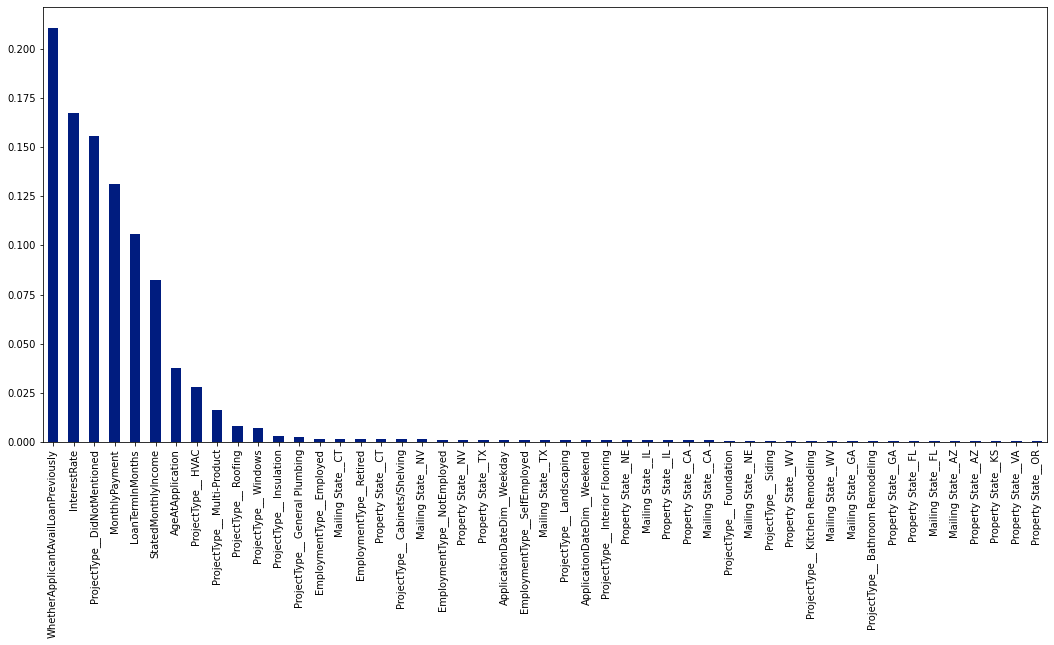

**************************************
Loan Status Prediction
**************************************
Classification Report
                  precision    recall  f1-score   support

        Approved       0.83      0.99      0.90      5886
Final - Canceled       0.28      0.14      0.19      1969
  Final - Denied       0.84      0.91      0.87     11821
 Final - Expired       0.34      0.19      0.25      2612

        accuracy                           0.78     22288
       macro avg       0.57      0.56      0.55     22288
    weighted avg       0.73      0.78      0.75     22288


Confusion Matrix
[[ 5818    27     0    41]
 [  474   275   932   288]
 [   27   418 10729   647]
 [  692   266  1151   503]]


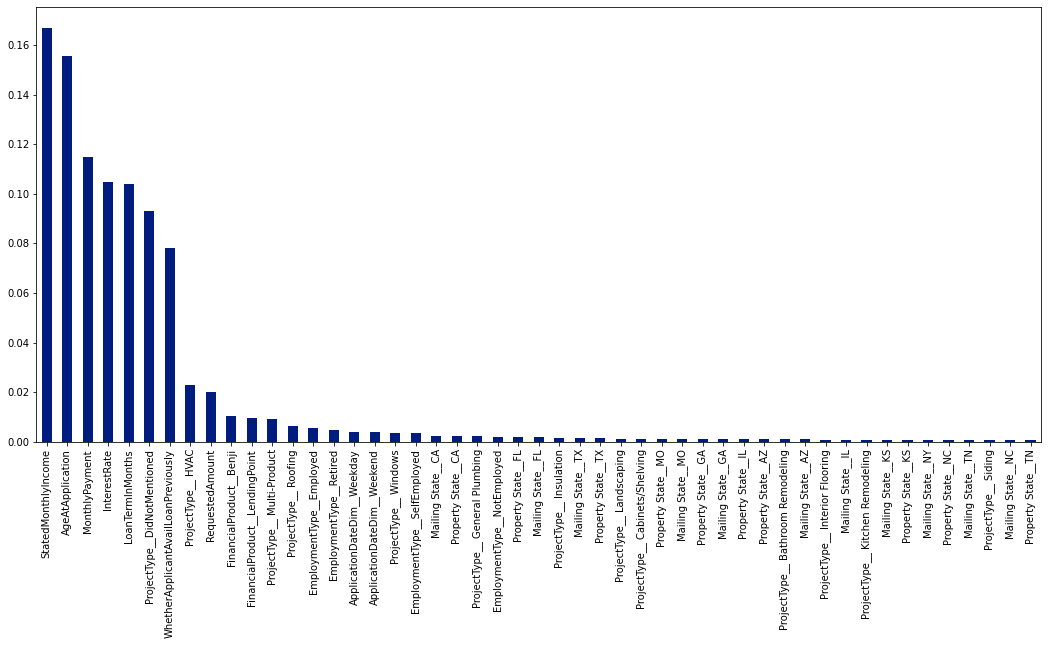

**************************************
Auto Decision Prediction
**************************************
Classification Report
              precision    recall  f1-score   support

    Approved       0.97      0.95      0.96      1861
      Denied       0.99      0.99      0.99      7724

    accuracy                           0.98      9585
   macro avg       0.98      0.97      0.98      9585
weighted avg       0.98      0.98      0.98      9585


Confusion Matrix
[[1776   85]
 [  64 7660]]


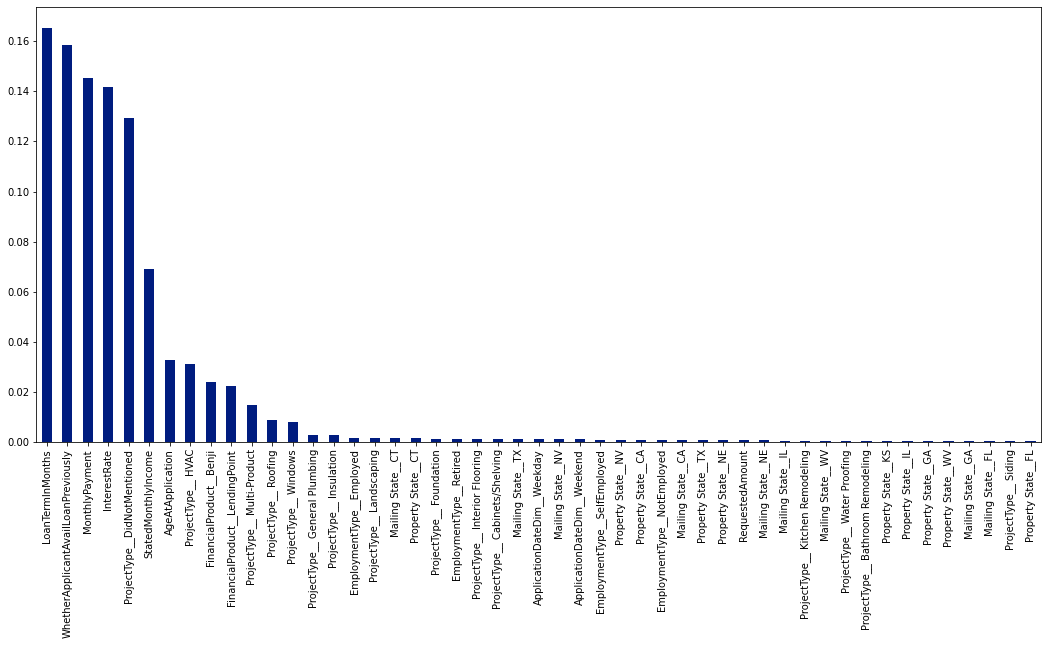

**************************************
Soft Decision Prediction
**************************************
Classification Report
              precision    recall  f1-score   support

    Approved       0.94      0.87      0.90      2700
      Denied       0.97      0.99      0.98     11796

    accuracy                           0.97     14496
   macro avg       0.95      0.93      0.94     14496
weighted avg       0.97      0.97      0.97     14496


Confusion Matrix
[[ 2360   340]
 [  160 11636]]


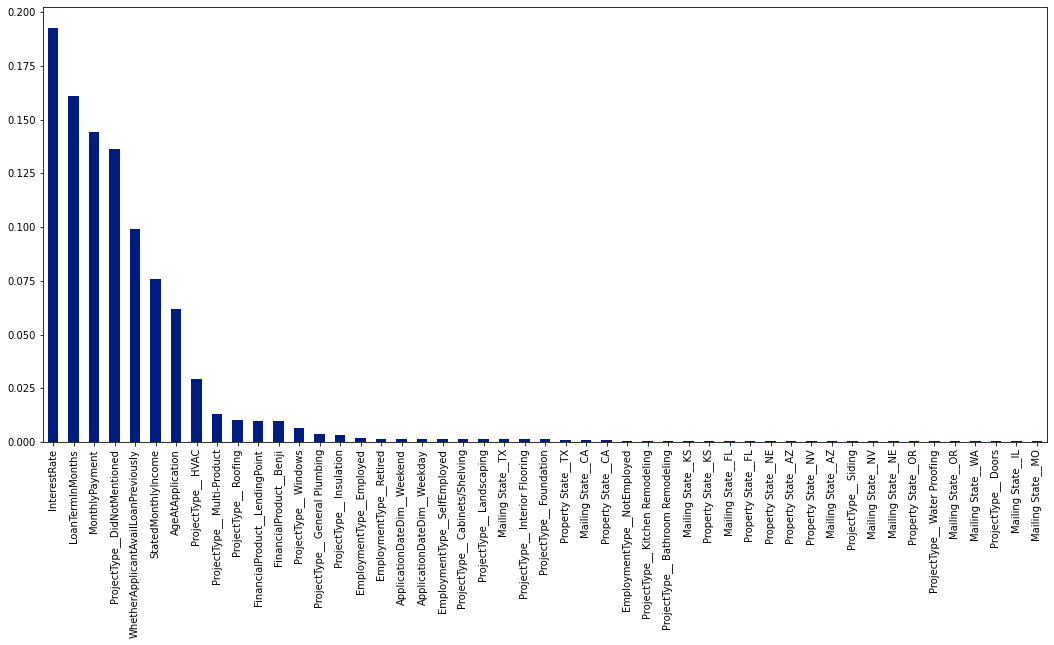

**************************************
Hard Decision Prediction
**************************************
Classification Report
              precision    recall  f1-score   support

    Approved       0.99      1.00      1.00      6591
      Denied       1.00      0.18      0.31        50

    accuracy                           0.99      6641
   macro avg       1.00      0.59      0.65      6641
weighted avg       0.99      0.99      0.99      6641


Confusion Matrix
[[6591    0]
 [  41    9]]


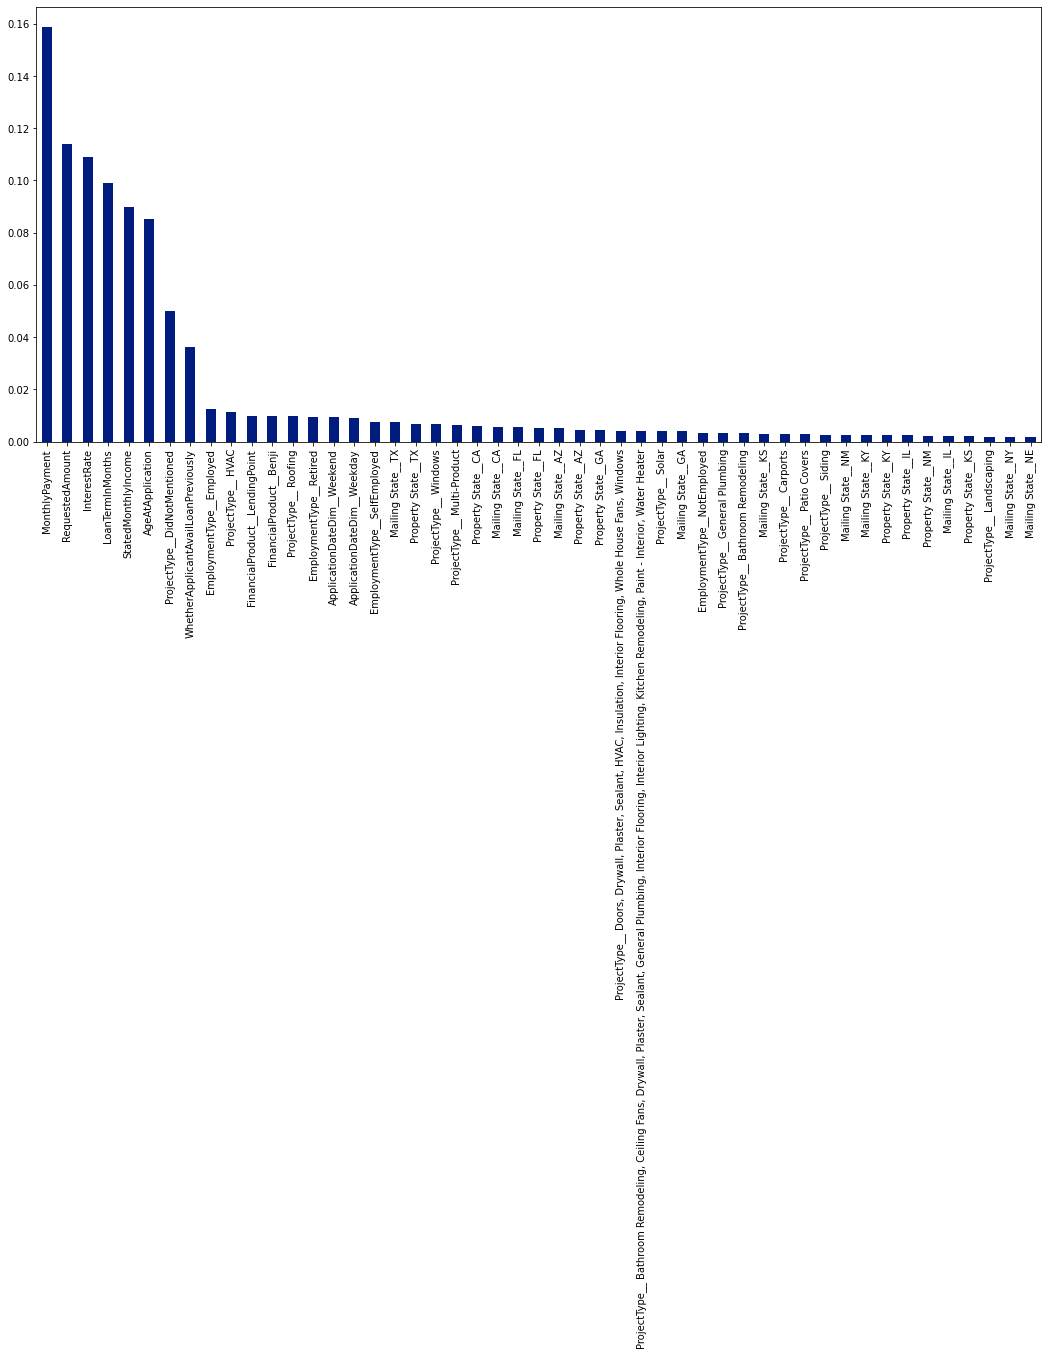

In [152]:
dataset_ausstaus = sub_dataset[sub_dataset["AUSStatus"].isin(["Denied", "Approved"])][sub_dataset.columns]
Y_ausstatus = sub_dataset[sub_dataset["AUSStatus"].isin(["Denied", "Approved"])][["AUSStatus"]]
dataset_ausstaus = dataset_ausstaus.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

dataset_loan = sub_dataset[sub_dataset["LoanStatus"].isin(["Final - Denied","Approved", "Final - Expired", "Final - Canceled"])][sub_dataset.columns]
Y_loan_status = sub_dataset[sub_dataset["LoanStatus"].isin(["Final - Denied","Approved", "Final - Expired", "Final - Canceled"])][["LoanStatus"]]
dataset_loan = dataset_loan.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

dataset_auto_decision = sub_dataset[sub_dataset["AutoDecision"].isin(["Denied", "Approved"])][sub_dataset.columns]
Y_auto_decision = sub_dataset[sub_dataset["AutoDecision"].isin(["Denied", "Approved"])][["AutoDecision"]]
dataset_auto_decision = dataset_auto_decision.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

dataset_soft_decision = sub_dataset[sub_dataset["SoftDecision"].isin(["Denied", "Approved"])][sub_dataset.columns]
Y_soft_decision = sub_dataset[sub_dataset["SoftDecision"].isin(["Denied", "Approved"])][["SoftDecision"]]
dataset_soft_decision = dataset_soft_decision.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

dataset_hard_decision = sub_dataset[sub_dataset["HardDecision"].isin(["Denied", "Approved"])][sub_dataset.columns]
Y_hard_decision = sub_dataset[sub_dataset["HardDecision"].isin(["Denied", "Approved"])][["HardDecision"]]
dataset_hard_decision = dataset_hard_decision.drop(columns=["AUSStatus", "LoanStatus", "AutoDecision", "SoftDecision", "HardDecision"])

print("**************************************")
print("AUSStatus Prediction")
print("**************************************")
trainMLAlgorithm(dataset_ausstaus, Y_ausstatus)

print("**************************************")
print("Loan Status Prediction")
print("**************************************")
trainMLAlgorithm(dataset_loan, Y_loan_status)

print("**************************************")
print("Auto Decision Prediction")
print("**************************************")
trainMLAlgorithm(dataset_auto_decision, Y_auto_decision)

print("**************************************")
print("Soft Decision Prediction")
print("**************************************")
trainMLAlgorithm(dataset_soft_decision, Y_soft_decision)

print("**************************************")
print("Hard Decision Prediction")
print("**************************************")
trainMLAlgorithm(dataset_hard_decision, Y_hard_decision)

## Financial Product

In [242]:
benji = data[data["FinancialProduct"] == "Benji"][["ApplicantId", "ApplicationDate"]].groupby(["ApplicationDate"]).count().reset_index()
benji.head(5)

,ApplicationDate,ApplicantId
0,2021-06-01,266
1,2021-06-02,273
2,2021-06-03,285
3,2021-06-04,262
4,2021-06-05,164


ROC AUC score: 0.78
RMSE =  29.39147808309563
R2 Score =  0.7821113328248621
MAE =  23.044363636363638


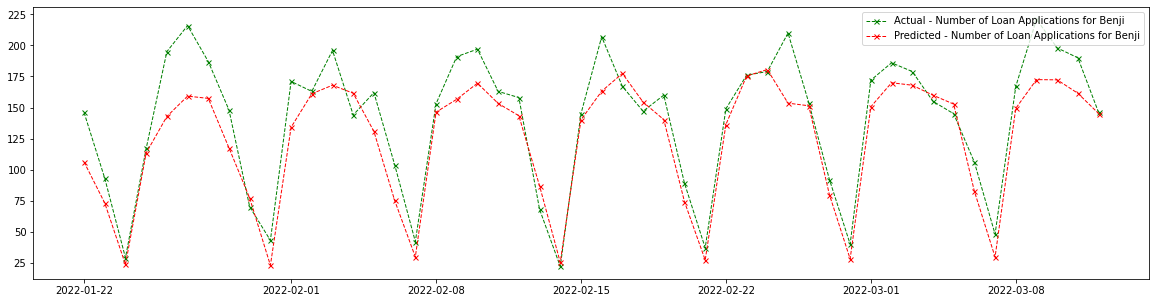

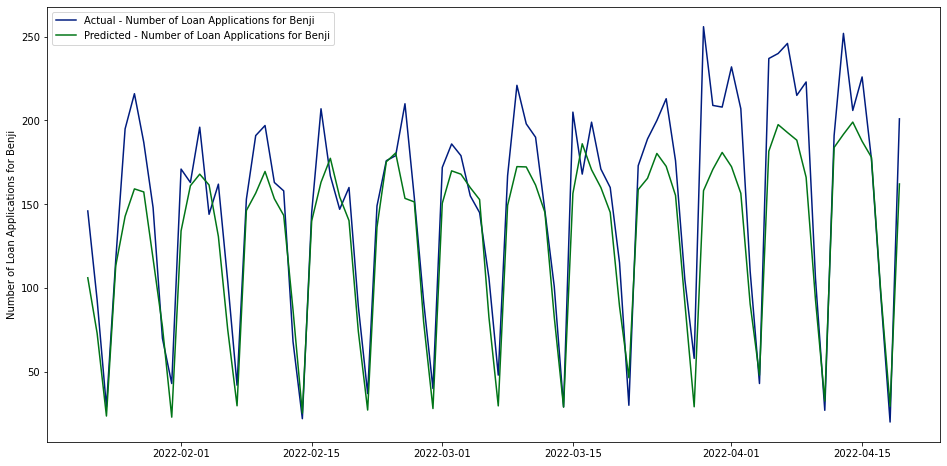

In [243]:
X, y = create_dataset(benji["ApplicantId"].values.reshape(-1, 1))
X_train, X_test = X[0:int(0.7*len(X))], X[int(0.7*len(X)):]
y_train, y_test = y[0:int(0.7*len(y))], y[int(0.7*len(y)):]

y_axis = applicant_per_month["ApplicationDate"].values
y_axis = y_axis[int(0.73*len(y_axis)):]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print('ROC AUC score: {:.2f}'.format(score))

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE = ", rmse)
print("R2 Score = ", r2_score(y_test, y_pred))
print("MAE = ", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(20,5))
plt.plot(y_axis[0:50], y_test[0:50], '--gx', markersize = 5 , linewidth = 1, label="Actual - Number of Loan Applications for Benji")
plt.plot(y_axis[0:50], y_pred[0:50], '--rx', markersize = 5 , linewidth = 1, label="Predicted - Number of Loan Applications for Benji")
plt.legend()

fig = plt.figure(figsize=(16,8))
a = [i for i in range(len(y_test))]
L = 0
H = 500
plt.plot(y_axis[L:H], y_test[L:H], label='Actual - Number of Loan Applications for Benji')
plt.plot(y_axis[L:H], y_pred[L:H], label='Predicted - Number of Loan Applications for Benji')
plt.legend()
plt.ylabel("Number of Loan Applications for Benji")
plt.show()

In [244]:
print("Applications Next Month")
nextMonth(model, X)

Applications Next Month


4715.0

In [245]:
LendingPoint = data[data["FinancialProduct"] == "LendingPoint"][["ApplicantId", "ApplicationDate"]].groupby(["ApplicationDate"]).count().reset_index()
LendingPoint.head(5)

,ApplicationDate,ApplicantId
0,2021-06-01,145
1,2021-06-02,134
2,2021-06-03,139
3,2021-06-04,126
4,2021-06-05,99


ROC AUC score: 0.73
RMSE =  15.036411857403166
R2 Score =  0.7315878338308246
MAE =  11.599727272727272


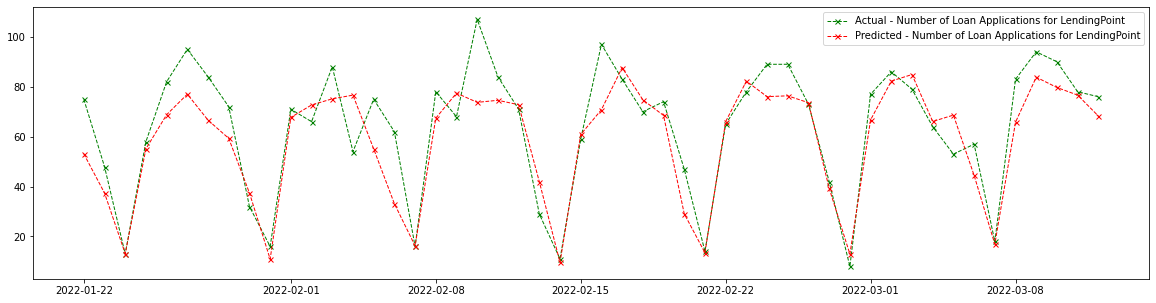

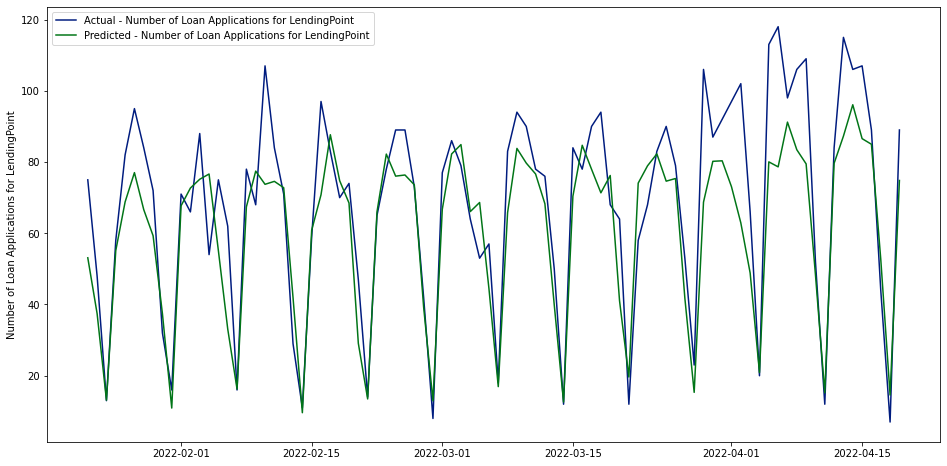

In [246]:
X, y = create_dataset(LendingPoint["ApplicantId"].values.reshape(-1, 1))
X_train, X_test = X[0:int(0.7*len(X))], X[int(0.7*len(X)):]
y_train, y_test = y[0:int(0.7*len(y))], y[int(0.7*len(y)):]

y_axis = applicant_per_month["ApplicationDate"].values
y_axis = y_axis[int(0.73*len(y_axis)):]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print('ROC AUC score: {:.2f}'.format(score))

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE = ", rmse)
print("R2 Score = ", r2_score(y_test, y_pred))
print("MAE = ", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(20,5))
plt.plot(y_axis[0:50], y_test[0:50], '--gx', markersize = 5 , linewidth = 1, label="Actual - Number of Loan Applications for LendingPoint")
plt.plot(y_axis[0:50], y_pred[0:50], '--rx', markersize = 5 , linewidth = 1, label="Predicted - Number of Loan Applications for LendingPoint")
plt.legend()

fig = plt.figure(figsize=(16,8))
a = [i for i in range(len(y_test))]
L = 0
H = 500
plt.plot(y_axis[L:H], y_test[L:H], label='Actual - Number of Loan Applications for LendingPoint')
plt.plot(y_axis[L:H], y_pred[L:H], label='Predicted - Number of Loan Applications for LendingPoint')
plt.legend()
plt.ylabel("Number of Loan Applications for LendingPoint")
plt.show()

In [247]:
print("Applications Next Month")
nextMonth(model, X)

Applications Next Month


2193.0